# Resumo do arquivo Word na pasta data
Esta célula lê e resume o conteúdo do arquivo Word encontrado na pasta `data`.

# Objetivo do Projeto
O objetivo do projeto está descrito no arquivo Word localizado na pasta `data`. Este documento detalha o propósito da análise e as metas a serem alcançadas.

# Dados Disponíveis
Os dados que podem ser utilizados para o projeto estão presentes em um arquivo Excel na pasta `data`. Este arquivo contém todas as informações necessárias para a preparação e análise dos dados.

# Início do Data Preparation
A seguir, será iniciado o processo de preparação dos dados, que inclui a leitura dos arquivos, análise exploratória e tratamento inicial.

In [57]:
!pip install openpyxl
!pip install squarify



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [263]:
# Importação das bibliotecas necessárias
import pandas as pd
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import squarify
import unicodedata
import seaborn as sns


#set max columns to 100
pd.set_option('display.max_columns', 100)

In [2]:
# Listar arquivos disponíveis na pasta data
data_dir = '../data'
print('Arquivos disponíveis na pasta data:')
print(os.listdir(data_dir))

Arquivos disponíveis na pasta data:
['DIGITAL LINE SA - Challenge 2.0 - PORT.docx', 'NAVEGANDO-db-challenge.xlsx']


In [5]:
# Carregar o arquivo Excel com os dados do projeto
excel_files = [f for f in os.listdir(data_dir) if f.endswith('.xlsx') or f.endswith('.xls')]
if excel_files:
    excel_path = os.path.join(data_dir, excel_files[0])
    df = pd.read_excel(excel_path)
    print('Dados carregados com sucesso!')
    display(df.head())
else:
    print('Nenhum arquivo Excel encontrado na pasta data.')

Dados carregados com sucesso!


,Country Name,Inversion Inicial [M usd],Margen Neto [%],Share de Mercado Navegando [%]
0,Estados Unidos,178,0.05,0.08
1,España,149,0.09,0.18
2,Italia,158,0.10,0.22
3,India,408,0.07,0.28
4,Australia,139,0.06,0.09


In [6]:
## Fazer a leitura do arquivo Excel para cada aba do arquivo
excel_files = [f for f in os.listdir(data_dir) if f.endswith('.xlsx') or f.endswith('.xls')]
excel_path = os.path.join(data_dir, excel_files[0])
xls = pd.ExcelFile(excel_path)
sheet_names = xls.sheet_names
print('Abas disponíveis no arquivo Excel:')
print(sheet_names)

Abas disponíveis no arquivo Excel:
['Mercados Navegando', 'Población mundial', 'Usuarios de internet global', 'Facturación Mercado Argentino', 'Tipo de cambio USD', 'Share de mercado Argentina', 'Acceso a internet en Argentina', 'IDE', 'Países', 'GDP', 'Defaults', 'Riesgo país']


In [531]:
# Salvar cada aba em um DataFrame separado
dfs = {}
for sheet in sheet_names:
    dfs[sheet] = pd.read_excel(xls, sheet_name=sheet)
    print(f'Dados da aba "{sheet}" carregados com sucesso!')
    display(dfs[sheet].head())      

Dados da aba "Mercados Navegando" carregados com sucesso!


,Country Name,Inversion Inicial [M usd],Margen Neto [%],Share de Mercado Navegando [%]
0,Estados Unidos,178,0.05,0.08
1,España,149,0.09,0.18
2,Italia,158,0.10,0.22
3,India,408,0.07,0.28
4,Australia,139,0.06,0.09


Dados da aba "Población mundial" carregados com sucesso!


,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Población, total",89101.0,90691.0,91781.0,92701.0,93540.0,94483.0,95606.0,96787.0,97996.0,99212.0,100341.0,101288.0,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0
1,Afganistán,AFG,"Población, total",19542982.0,19688632.0,21000256.0,22645130.0,23553551.0,24411191.0,25442944.0,25903301.0,26427199.0,27385307.0,28189672.0,29249157.0,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0
2,Angola,AGO,"Población, total",16394062.0,16941587.0,17516139.0,18124342.0,18771125.0,19450959.0,20162340.0,20909684.0,21691522.0,22507674.0,23364185.0,24259111.0,25188292.0,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0
3,Albania,ALB,"Población, total",3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837849.0
4,Andorra,AND,"Población, total",66097.0,67820.0,70849.0,73907.0,76933.0,79826.0,80221.0,78168.0,76055.0,73852.0,71519.0,70567.0,71013.0,71367.0,71621.0,71746.0,72540.0,73837.0,75013.0,76343.0,77700.0


Dados da aba "Usuarios de internet global" carregados com sucesso!


,Country Name,Country Code,Año,Porcentaje
0,Aruba,ABW,2000,NaN
1,Afganistán,AFG,2000,NaN
2,Angola,AGO,2000,0.018454
3,Albania,ALB,2000,0.065027
4,Andorra,AND,2000,6.886209


Dados da aba "Facturación Mercado Argentino" carregados com sucesso!


,Year,Month,Tipo,Pais,Servicio,Indicador,Valor,Unidad
0,2020,Junio,Información Económica,Argentina,Acceso a Internet Fija,Facturación,"$ 15,731",M ARS
1,2020,Marzo,Información Económica,Argentina,Acceso a Internet Fija,Facturación,"$ 13,904",M ARS
2,2019,Diciembre,Información Económica,Argentina,Acceso a Internet Fija,Facturación,"$ 11,226",M ARS
3,2019,Septiembre,Información Económica,Argentina,Acceso a Internet Fija,Facturación,"$ 10,066",M ARS
4,2019,Junio,Información Económica,Argentina,Acceso a Internet Fija,Facturación,"$ 9,679",M ARS


Dados da aba "Tipo de cambio USD" carregados com sucesso!


,YEAR,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,VIS-A-VIS ECON.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan (AFN),0.044998,0.044998,0.044998,0.044998,0.044998,0.044998,0.044998,0.044998,0.044998,0.043731,0.044129,0.04948,0.0506,0.0506,0.0506,0.0506,0.0506,0.0506,0.0506,0.0506,0.0506,0.0506,0.0506,0.0506,0.4251,0.833333,2.500023,3.00003,3.000053,46.619531,47.357575,47.500015,47.263,48.762754,47.845312,49.494597,49.925331,49.962018,50.249615,50.325,46.452461,46.747008,50.9214,55.3775,57.2475,61.143462,67.866086,68.026904,72.083247,77.737949
2,Albania (ALL),5,5,5,5,5,5,5,5,5,6.167123,7,7,7,7,7,7,7,7,6.67,6.13,7.56297,9.913647,32.275396,71.144097,94.623333,92.6975,104.498917,148.932917,150.633333,137.690583,143.709417,143.484833,140.154516,121.86325,102.780051,99.870254,98.103377,90.427894,83.894604,94.97812,103.936667,100.895833,108.184167,105.669167,105.48,125.961667,124.1425,119.1,107.989167,109.850833
3,Algeria (DZD),4.93706,4.912638,4.480515,3.962495,4.18075,3.949408,4.163825,4.146758,3.9659,3.853267,3.83745,4.315808,4.592192,4.7888,4.983375,5.0278,4.702317,4.849742,5.914767,7.608558,8.957508,18.472875,21.836075,23.345407,35.058501,47.662727,54.748933,57.70735,58.738958,66.573875,75.259792,77.215021,79.6819,77.394975,72.06065,73.276308,72.646617,69.2924,64.5828,72.647417,74.385983,72.937883,77.535967,79.3684,80.579017,100.691433,109.443067,110.973017,116.593792,119.436508
4,Andorra (EUR),0.420708,0.417515,0.386279,0.35015,0.346703,0.345023,0.402095,0.45654,0.460783,0.403429,0.430937,0.554865,0.660267,0.862031,0.966193,1.021986,0.841708,0.74212,0.7001,0.711464,0.612635,0.624521,0.615311,0.764851,0.805104,0.749396,0.761251,0.879964,0.897884,0.938283,1.082705,1.116533,1.057559,0.884048,0.803922,0.8038,0.796433,0.729672,0.679923,0.716958,0.754309,0.718414,0.778338,0.752945,0.752728,0.901296,0.903421,0.885206,0.846773,0.893276


Dados da aba "Share de mercado Argentina" carregados com sucesso!


,Year,Month,Pais,Servicio,Competidor,Share Mercado
0,2020,Junio,Argentina,Empresas,Empresa 1,0.46
1,2020,Junio,Argentina,Empresas,Empresa 2,0.17
2,2020,Junio,Argentina,Empresas,Empresa 3,0.12
3,2020,Junio,Argentina,Empresas,Empresa 4,0.06
4,2020,Junio,Argentina,Empresas,Otros,0.19


Dados da aba "Acceso a internet en Argentina" carregados com sucesso!


,Year,Month,Tipo,Pais,Servicio,Indicador,Valor,Unidad
0,2020,Marzo,Información Física,Argentina,Acceso a Internet Fija,% de hogares con Internet,58.82,c/100 habitantes
1,2019,Diciembre,Información Física,Argentina,Acceso a Internet Fija,% de hogares con Internet,57.78,c/100 habitantes
2,2019,Septiembre,Información Física,Argentina,Acceso a Internet Fija,% de hogares con Internet,56.9,c/100 habitantes
3,2019,Junio,Información Física,Argentina,Acceso a Internet Fija,% de hogares con Internet,54.9,c/100 habitantes
4,2019,Marzo,Información Física,Argentina,Acceso a Internet Fija,% de hogares con Internet,54.16,c/100 habitantes


Dados da aba "IDE" carregados com sucesso!


,"Annex table 1. FDI inflows, by region and economy, 1990-2019 (Millions of dollars)",Unnamed: 1,Unnamed: 2
0,NaN,Year,Value
1,Region/economy,Year,Value
2,World,2010,1 396 203.3
3,Developed economies,2010,710 394.4
4,Europe,2010,441 247.2


Dados da aba "Países" carregados com sucesso!


,Country Name,Country Code,Region,Income_Group,Codigo Moneda
0,Ingreso mediano,MIC,NaN,Agregados,NaN
1,Afganistán,AFG,Asia meridional,Países de ingreso bajo,NaN
2,África al sur del Sahara,SSF,NaN,Agregados,NaN
3,África al sur del Sahara (BIRF y la AIF),TSS,NaN,Agregados,NaN
4,África al sur del Sahara (excluido altos ingre...,SSA,NaN,Agregados,NaN


Dados da aba "GDP" carregados com sucesso!


,"Gross domestic product: GDP by type of expenditure, VA by kind of economic activity, total and shares, annual [US dollars at current prices in millions]",Unnamed: 1,Unnamed: 2,Unnamed: 3
0,ECONOMY,COMPONENT,YEAR,GDP
1,United Nations member States,Gross domestic product (GDP),2018,"84,610,025.43"
2,United Nations member States,Total value added,2018,"80,626,879.67"
3,United Nations member States,Gross domestic product (GDP),2017,"79,750,397.45"
4,United Nations member States,Gross domestic product (GDP),2014,"78,300,791.33"


Dados da aba "Defaults" carregados com sucesso!


,Pais,Fecha,Cantidad
0,Ecuador,1980-2000,3
1,Venezuela,1980-2000,4
2,Brasil,1980-2000,1
3,Chile,1980-2000,1
4,Costa Rica,1980-2000,3


Dados da aba "Riesgo país" carregados com sucesso!


,Fecha,Pais,Riesgo
0,2007-10-29 00:00:00,Argentina,3.50
1,2007-10-30 00:00:00,Argentina,3.41
2,2007-10-31 00:00:00,Argentina,2023-12-03 00:00:00
3,2007-11-01 00:00:00,Argentina,3.29
4,2007-11-02 00:00:00,Argentina,3.41


## Entendimento de tabelas
- **Mercados Navegando:** Recursos financeiros que a empresa investiu ao iniciar suas operações em cada país.
- **Población mundial:** Dados históricos da população total de diversos países.
- **Usuarios de internet global:** Porcentagem de usuários de internet por país e ano.
- **Facturación Mercado Argentino:** Faturamento do mercado na Argentina ao longo do tempo.
- **Tipo de cambio USD:** Histórico da cotação do dólar em relação à moedas.
- **Share de mercado Argentina:** Participação de mercado das principais empresas na Argentina.
- **Acceso a internet en Argentina:** Percentual da população argentina com acesso à internet.
- **IDE:** Investimento Direto Estrangeiro recebido por país.
- **Países:** Lista de países e possíveis classificações ou agrupamentos.
- **GDP:** Produto Interno Bruto dos países ao longo do tempo.
- **Defaults:** Dados sobre inadimplência ou calotes financeiros por país.
- **Riesgo país:** Índice de risco-país para diferentes nações.

### Tab Facturación Mercado Argentino

In [74]:
dfs['Facturación Mercado Argentino'].shape

(18, 8)

In [75]:
dfs['Facturación Mercado Argentino'].sample(10)

,Year,Month,Tipo,Pais,Servicio,Indicador,Valor,Unidad
11,2017,Septiembre,Información Económica,Argentina,Acceso a Internet Fija,Facturación,"$ 5,154",M ARS
14,2016,Diciembre,Información Económica,Argentina,Acceso a Internet Fija,Facturación,"$ 3,950",M ARS
6,2018,Diciembre,Información Económica,Argentina,Acceso a Internet Fija,Facturación,"$ 7,484",M ARS
12,2017,Junio,Información Económica,Argentina,Acceso a Internet Fija,Facturación,"$ 4,702",M ARS
17,2016,Marzo,Información Económica,Argentina,Acceso a Internet Fija,Facturación,"$ 2,984",M ARS
9,2018,Marzo,Información Económica,Argentina,Acceso a Internet Fija,Facturación,"$ 5,937",M ARS
0,2020,Junio,Información Económica,Argentina,Acceso a Internet Fija,Facturación,"$ 15,731",M ARS
7,2018,Septiembre,Información Económica,Argentina,Acceso a Internet Fija,Facturación,"$ 6,912",M ARS
16,2016,Junio,Información Económica,Argentina,Acceso a Internet Fija,Facturación,"$ 3,271",M ARS
1,2020,Marzo,Información Económica,Argentina,Acceso a Internet Fija,Facturación,"$ 13,904",M ARS


In [76]:
dfs['Facturación Mercado Argentino'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Year       18 non-null     int64 
 1   Month      18 non-null     object
 2   Tipo       18 non-null     object
 3   Pais       18 non-null     object
 4   Servicio   18 non-null     object
 5   Indicador  18 non-null     object
 6   Valor      18 non-null     object
 7   Unidad     18 non-null     object
dtypes: int64(1), object(7)
memory usage: 1.2+ KB


In [77]:
# Ajustes de valores numericos
dfs['Facturación Mercado Argentino']['Valor'] = dfs['Facturación Mercado Argentino']['Valor'].apply(lambda x: x.replace('$ ', '').replace(',', '.').strip()).astype(float)

In [78]:
dfs['Facturación Mercado Argentino'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       18 non-null     int64  
 1   Month      18 non-null     object 
 2   Tipo       18 non-null     object 
 3   Pais       18 non-null     object 
 4   Servicio   18 non-null     object 
 5   Indicador  18 non-null     object 
 6   Valor      18 non-null     float64
 7   Unidad     18 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.2+ KB


In [79]:
#criação de variaveis
lst_mes_num = {'Marzo':3, 'Junio':6, 'Septiembre':9, 'Diciembre':12}
dfs['Facturación Mercado Argentino']['month_num']= dfs['Facturación Mercado Argentino']['Month'].map(lst_mes_num)

In [80]:
# Ordenar o DataFrame por 'Year' e 'month_num' e criar lag
dfs['Facturación Mercado Argentino'].sort_values(by=['Year', 'month_num'], inplace=True)
dfs['Facturación Mercado Argentino']['lag_1'] = dfs['Facturación Mercado Argentino']['Valor'].shift(1)
dfs['Facturación Mercado Argentino']['var_factm'] = dfs['Facturación Mercado Argentino']['Valor'] / dfs['Facturación Mercado Argentino']['lag_1'] - 1

In [81]:
dfs['Facturación Mercado Argentino'].head(18)

,Year,Month,Tipo,Pais,Servicio,Indicador,Valor,Unidad,month_num,lag_1,var_factm
17,2016,Marzo,Información Económica,Argentina,Acceso a Internet Fija,Facturación,2.984,M ARS,3,NaN,NaN
16,2016,Junio,Información Económica,Argentina,Acceso a Internet Fija,Facturación,3.271,M ARS,6,2.984,0.096180
15,2016,Septiembre,Información Económica,Argentina,Acceso a Internet Fija,Facturación,3.479,M ARS,9,3.271,0.063589
14,2016,Diciembre,Información Económica,Argentina,Acceso a Internet Fija,Facturación,3.950,M ARS,12,3.479,0.135384
13,2017,Marzo,Información Económica,Argentina,Acceso a Internet Fija,Facturación,4.876,M ARS,3,3.950,0.234430
12,2017,Junio,Información Económica,Argentina,Acceso a Internet Fija,Facturación,4.702,M ARS,6,4.876,-0.035685
11,2017,Septiembre,Información Económica,Argentina,Acceso a Internet Fija,Facturación,5.154,M ARS,9,4.702,0.096129
10,2017,Diciembre,Información Económica,Argentina,Acceso a Internet Fija,Facturación,5.377,M ARS,12,5.154,0.043267
9,2018,Marzo,Información Económica,Argentina,Acceso a Internet Fija,Facturación,5.937,M ARS,3,5.377,0.104147
8,2018,Junio,Información Económica,Argentina,Acceso a Internet Fija,Facturación,6.534,M ARS,6,5.937,0.100556


In [82]:
dfs['Facturación Mercado Argentino']['data'] = pd.to_datetime(dfs['Facturación Mercado Argentino'][['Year', 'month_num']].assign(Day=1).rename(columns={'month_num': 'Month'})).dt.to_period('M')

In [83]:
# dfs['Facturación Mercado Argentino']['data']
# Corrigir a coluna 'data'
if pd.api.types.is_period_dtype(dfs['Facturación Mercado Argentino']['data']):
    dfs['Facturación Mercado Argentino']['data'] = dfs['Facturación Mercado Argentino']['data'].dt.to_timestamp()
else:
    dfs['Facturación Mercado Argentino']['data'] = pd.to_datetime(dfs['Facturación Mercado Argentino']['data'])

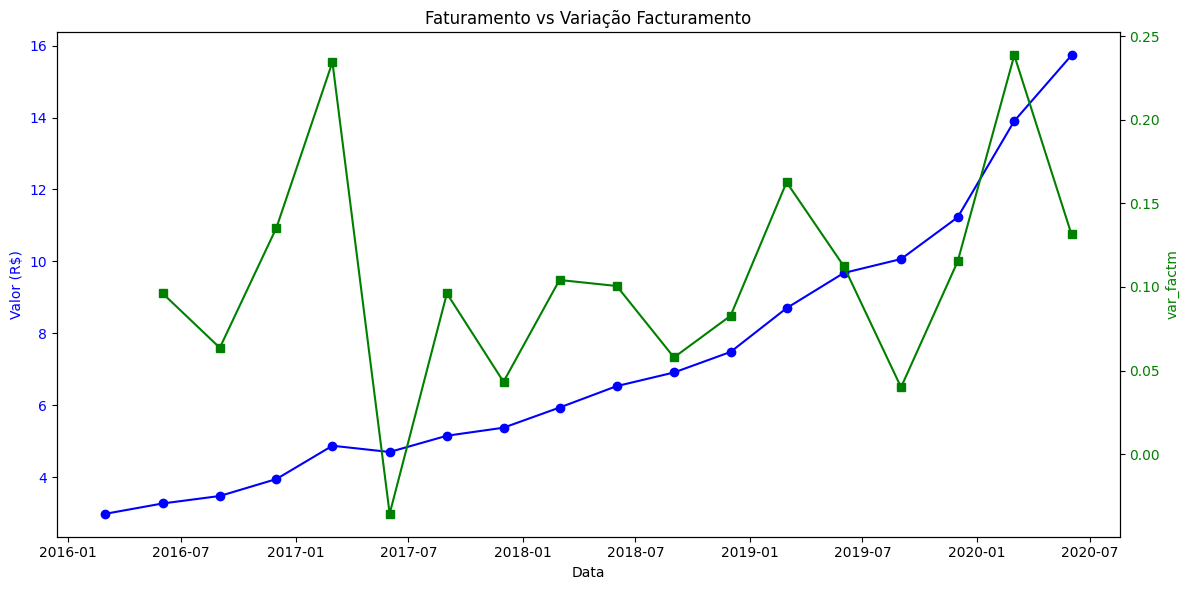

In [53]:

# Criar figura e dois eixos
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primeiro eixo Y (esquerda)
ax1.plot(dfs['Facturación Mercado Argentino']['data'], dfs['Facturación Mercado Argentino']['Valor'], color='blue', marker='o', label='Valor')
ax1.set_ylabel('Valor (R$)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Segundo eixo Y (direita)
ax2 = ax1.twinx()
ax2.plot(dfs['Facturación Mercado Argentino']['data'], dfs['Facturación Mercado Argentino']['var_factm'], color='green', marker='s', label='Faturamento')
ax2.set_ylabel('var_factm', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Eixo X
ax1.set_xlabel('Data')
ax1.set_title('Faturamento vs Variação Facturamento')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Tab Share de mercado Argentina

In [84]:
dfs['Share de mercado Argentina'].shape

(5, 6)

In [85]:
dfs['Share de mercado Argentina'].sample(5)

,Year,Month,Pais,Servicio,Competidor,Share Mercado
0,2020,Junio,Argentina,Empresas,Empresa 1,0.46
1,2020,Junio,Argentina,Empresas,Empresa 2,0.17
4,2020,Junio,Argentina,Empresas,Otros,0.19
3,2020,Junio,Argentina,Empresas,Empresa 4,0.06
2,2020,Junio,Argentina,Empresas,Empresa 3,0.12


In [86]:
dfs['Share de mercado Argentina'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           5 non-null      int64  
 1   Month          5 non-null      object 
 2   Pais           5 non-null      object 
 3   Servicio       5 non-null      object 
 4   Competidor     5 non-null      object 
 5   Share Mercado  5 non-null      float64
dtypes: float64(1), int64(1), object(4)
memory usage: 368.0+ bytes


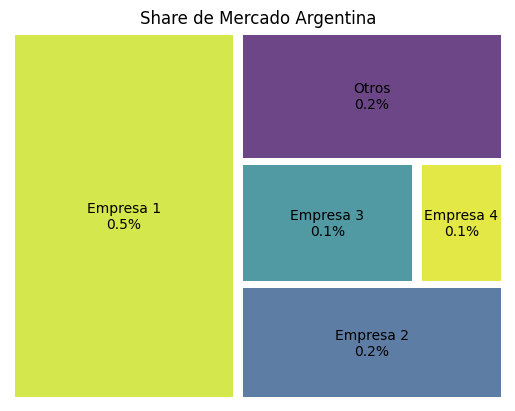

In [91]:
# Treemap
labels = [
    f"{comp}\n{valor:.1f}%" 
    for comp, valor in zip(dfs['Share de mercado Argentina']['Competidor'], dfs['Share de mercado Argentina']['Share Mercado'])
]


squarify.plot(sizes=dfs['Share de mercado Argentina']['Share Mercado'], 
              label=labels, #dfs['Share de mercado Argentina']['Competidor'], 
              alpha=0.8,
              pad=True)
plt.title('Share de Mercado Argentina')
plt.axis('off')  # Remove os eixos para melhor visualização
plt.show()


### Tab Acceso a internet en Argentina

In [92]:
dfs['Acceso a internet en Argentina'].shape

(341, 8)

In [93]:
dfs['Acceso a internet en Argentina'].sample(5)

,Year,Month,Tipo,Pais,Servicio,Indicador,Valor,Unidad
277,2016,Marzo,Información Física,Argentina,Acceso a Internet Fija,Accesos Tecnología Wireless,70.749,NaN
275,2016,Septiembre,Información Física,Argentina,Acceso a Internet Fija,Accesos Tecnología Wireless,85.096,NaN
269,2018,Marzo,Información Física,Argentina,Acceso a Internet Fija,Accesos Tecnología Wireless,85.37,NaN
98,2017,Diciembre,Información Física,Argentina,Acceso a Internet Fija,Accesos por Velocidad Entre 10 Mbps y 20 Mbps,639.011,NaN
115,2017,Diciembre,Información Física,Argentina,Acceso a Internet Fija,Accesos por Velocidad Entre 20 Mbps y 30 Mbps,17.568,NaN


In [94]:
#criação de variaveis
lst_mes_num = {'Marzo':3, 'Junio':6, 'Septiembre':9, 'Diciembre':12}
dfs['Acceso a internet en Argentina']['month_num']= dfs['Acceso a internet en Argentina']['Month'].map(lst_mes_num)

In [95]:
dfs['Acceso a internet en Argentina']['Valor'] = dfs['Acceso a internet en Argentina']['Valor'].apply(lambda x: f"{x.day}.{x.month}" if isinstance(x, (pd.Timestamp, datetime)) else x)

In [96]:
valores_indicadores = list(dfs['Acceso a internet en Argentina']['Indicador'].unique())
for i in valores_indicadores:
    print(i)
    print(dfs['Acceso a internet en Argentina'][dfs['Acceso a internet en Argentina']['Indicador'] == i][['Indicador', 'Valor', 'Unidad']].head())
    print('\n')

% de hogares con Internet
                   Indicador  Valor            Unidad
0  % de hogares con Internet  58.82  c/100 habitantes
1  % de hogares con Internet  57.78  c/100 habitantes
2  % de hogares con Internet   56.9  c/100 habitantes
3  % de hogares con Internet   54.9  c/100 habitantes
4  % de hogares con Internet  54.16  c/100 habitantes


Accesos
   Indicador      Valor Unidad
19   Accesos  8,110,000    NaN
20   Accesos  8,030,000    NaN
21   Accesos  7,870,000    NaN
22   Accesos  7,724,943    NaN
23   Accesos  7,429,664    NaN


Accesos Banda Ancha
              Indicador      Valor Unidad
37  Accesos Banda Ancha  8,080,000    NaN
38  Accesos Banda Ancha  8,010,000    NaN
39  Accesos Banda Ancha  7,842,778    NaN
40  Accesos Banda Ancha  7,696,594    NaN
41  Accesos Banda Ancha  7,401,134    NaN


Accesos Banda Angosta
                Indicador   Valor Unidad
55  Accesos Banda Angosta  27.072    NaN
56  Accesos Banda Angosta  27.444    NaN
57  Accesos Banda Angosta  28.349

In [97]:
# Limpeza e padronizaçãon dos valores
def ajustar_y(row):
    if row['Indicador'] in ['Accesos', 
                                'Accesos Banda Ancha', 
                                'Accesos por Velocidad Entre 1 Mbps y 6 Mbps',
                                'Accesos por Velocidad Entre 10 Mbps y 20 Mbps',
                                'Accesos Tecnología ADSL',
                                'Accesos Tecnología Cablemódem',
                                'Accesos por Velocidad Entre 6 Mbps y 10 Mbps'
                                
                                ]:
        return float(str(row['Valor']).replace(',', ''))
    
    elif row['Indicador'] in ['Accesos Banda Angosta',
                                'Accesos por Velocidad Entre 20 Mbps y 30 Mbps',
                                'Accesos por Velocidad Entre 512 y 1 Mbps',
                                'Accesos por Velocidad Hasta 512 mbps',
                                'Accesos por Velocidad Más de 30 Mbps',
                                'Accesos por Velocidad Otros',
                                'Accesos Tecnología Fibra Óptica',
                                'Accesos Tecnología Otros',
                                'Accesos Tecnología Wireless',


                                ]:
        return float(row['Valor'])*1000
    
#   elif row['Indicador'] in ['Accesos por Velocidad Entre 6 Mbps y 10 Mbps',
#                               
#                               ]:
#       return float(str(row['Valor']).replace(',', '').replace('.', ''))
    
    elif row['Indicador'] in ['Facturación']:
        return float(str(row['Valor']).replace('$ ', '').replace(',', '.'))
    
    else:
        #% de hogares con Internet',
        #                      'Penetración',
         #                     'Velocidad Media de Descarga'
         # Empresas
        return float(str(row['Valor']).replace('%', ''))
    

dfs['Acceso a internet en Argentina']['Valor'] = dfs['Acceso a internet en Argentina'].apply(ajustar_y, axis=1)

# ajustando valor 
dfs['Acceso a internet en Argentina']['Valor'] = np.where(
    (dfs['Acceso a internet en Argentina']['Indicador'] == 'Accesos por Velocidad Entre 10 Mbps y 20 Mbps')&
    (dfs['Acceso a internet en Argentina']['Valor'] < 1000), dfs['Acceso a internet en Argentina']['Valor']*1000,
    dfs['Acceso a internet en Argentina']['Valor'])

dfs['Acceso a internet en Argentina']['Valor'] = np.where(
        (dfs['Acceso a internet en Argentina']['Indicador'] == 'Accesos por Velocidad Entre 6 Mbps y 10 Mbps')&
        (dfs['Acceso a internet en Argentina']['Valor'] < 1000), dfs['Acceso a internet en Argentina']['Valor']*1000,
        dfs['Acceso a internet en Argentina']['Valor'])


In [98]:
valores_indicadores = list(dfs['Acceso a internet en Argentina']['Indicador'].unique())
for i in valores_indicadores:
    print(i)
    print(dfs['Acceso a internet en Argentina'][dfs['Acceso a internet en Argentina']['Indicador'] == i][['Indicador', 'Valor', 'Unidad']].head())
    print('\n')

% de hogares con Internet
                   Indicador  Valor            Unidad
0  % de hogares con Internet  58.82  c/100 habitantes
1  % de hogares con Internet  57.78  c/100 habitantes
2  % de hogares con Internet  56.90  c/100 habitantes
3  % de hogares con Internet  54.90  c/100 habitantes
4  % de hogares con Internet  54.16  c/100 habitantes


Accesos
   Indicador      Valor Unidad
19   Accesos  8110000.0    NaN
20   Accesos  8030000.0    NaN
21   Accesos  7870000.0    NaN
22   Accesos  7724943.0    NaN
23   Accesos  7429664.0    NaN


Accesos Banda Ancha
              Indicador      Valor Unidad
37  Accesos Banda Ancha  8080000.0    NaN
38  Accesos Banda Ancha  8010000.0    NaN
39  Accesos Banda Ancha  7842778.0    NaN
40  Accesos Banda Ancha  7696594.0    NaN
41  Accesos Banda Ancha  7401134.0    NaN


Accesos Banda Angosta
                Indicador    Valor Unidad
55  Accesos Banda Angosta  27072.0    NaN
56  Accesos Banda Angosta  27444.0    NaN
57  Accesos Banda Angosta  283

In [99]:
dfs['Acceso a internet en Argentina'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       341 non-null    int64  
 1   Month      341 non-null    object 
 2   Tipo       336 non-null    object 
 3   Pais       341 non-null    object 
 4   Servicio   341 non-null    object 
 5   Indicador  341 non-null    object 
 6   Valor      341 non-null    float64
 7   Unidad     75 non-null     object 
 8   month_num  336 non-null    float64
dtypes: float64(2), int64(1), object(6)
memory usage: 24.1+ KB


In [100]:
# deletar dados de mepresas pois ja temos em outra tabela
dfs['Acceso a internet en Argentina'] = dfs['Acceso a internet en Argentina'][dfs['Acceso a internet en Argentina']['Servicio']!='Empresas']

In [101]:
# Duplicaidade das linhas
indices = dfs['Acceso a internet en Argentina'][
    (dfs['Acceso a internet en Argentina']['Indicador'].isin([r'% de hogares con Internet', 'Penetración']))&
    (dfs['Acceso a internet en Argentina']['Tipo']==r'Misceláneas')
    ].index

dfs['Acceso a internet en Argentina'] = dfs['Acceso a internet en Argentina'].drop(indices)

In [102]:
# Duplicidade das linhas
print('linhas duplicadas:', dfs['Acceso a internet en Argentina'].duplicated().sum())
dfs['Acceso a internet en Argentina'].drop_duplicates(inplace=True)

linhas duplicadas: 3


In [103]:
# Calculo de variação percentual
dfs['Acceso a internet en Argentina'].sort_values(by=['Indicador', 'Year', 'month_num'], inplace=True)
dfs['Acceso a internet en Argentina']
# dfs['Acceso a internet en Argentina']['lag1'] = dfs['Acceso a internet en Argentina'].groupby([ 'Year', 'month_num', 'Indicador'])['Valor'].shift(1)

,Year,Month,Tipo,Pais,Servicio,Indicador,Valor,Unidad,month_num
16,2016,Marzo,Información Física,Argentina,Acceso a Internet Fija,% de hogares con Internet,49.55,c/100 habitantes,3.0
15,2016,Junio,Información Física,Argentina,Acceso a Internet Fija,% de hogares con Internet,49.86,c/100 habitantes,6.0
14,2016,Septiembre,Información Física,Argentina,Acceso a Internet Fija,% de hogares con Internet,50.67,c/100 habitantes,9.0
13,2016,Diciembre,Información Física,Argentina,Acceso a Internet Fija,% de hogares con Internet,50.50,c/100 habitantes,12.0
12,2017,Marzo,Información Física,Argentina,Acceso a Internet Fija,% de hogares con Internet,51.36,c/100 habitantes,3.0
...,...,...,...,...,...,...,...,...,...
322,2019,Junio,Misceláneas,Argentina,Acceso a Internet Fija,Velocidad Media de Descarga,7.16,mbps,6.0
321,2019,Septiembre,Misceláneas,Argentina,Acceso a Internet Fija,Velocidad Media de Descarga,8.34,mbps,9.0
320,2019,Diciembre,Misceláneas,Argentina,Acceso a Internet Fija,Velocidad Media de Descarga,12.10,mbps,12.0
318,2020,Marzo,Misceláneas,Argentina,Acceso a Internet Fija,Velocidad Media de Descarga,13.22,mbps,3.0


In [104]:
# Calculo de variação percentual
dfs['Acceso a internet en Argentina']['lag_1'] = np.nan
for indicador in dfs['Acceso a internet en Argentina']['Indicador'].unique():

    indexs_test = dfs['Acceso a internet en Argentina'][dfs['Acceso a internet en Argentina']['Indicador']==indicador].sort_values(by=['Year', 'month_num']).index
    dfs['Acceso a internet en Argentina']['lag_1'][indexs_test] = dfs['Acceso a internet en Argentina'][
        dfs['Acceso a internet en Argentina']['Indicador']==indicador
        ].sort_values(by=['Year', 'month_num'])['Valor'].shift(1)

# variação percentual
dfs['Acceso a internet en Argentina']['var_valor'] = dfs['Acceso a internet en Argentina']['Valor'] / dfs['Acceso a internet en Argentina']['lag_1'] - 1

/tmp/ipykernel_2292032/650834155.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['Acceso a internet en Argentina']['lag_1'][indexs_test] = dfs['Acceso a internet en Argentina'][
/tmp/ipykernel_2292032/650834155.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['Acceso a internet en Argentina']['lag_1'][indexs_test] = dfs['Acceso a internet en Argentina'][
/tmp/ipykernel_2292032/650834155.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [105]:
dfs['Acceso a internet en Argentina'].tail(20)

,Year,Month,Tipo,Pais,Servicio,Indicador,Valor,Unidad,month_num,lag_1,var_valor
298,2019,Diciembre,Información Física,Argentina,Acceso a Internet Fija,Penetración,17.79,c/100 habitantes,12.0,17.51,0.015991
296,2020,Marzo,Información Física,Argentina,Acceso a Internet Fija,Penetración,18.12,c/100 habitantes,3.0,17.79,0.018550
335,2016,Marzo,Misceláneas,Argentina,Acceso a Internet Fija,Velocidad Media de Descarga,3.62,mbps,3.0,NaN,NaN
334,2016,Junio,Misceláneas,Argentina,Acceso a Internet Fija,Velocidad Media de Descarga,3.76,mbps,6.0,3.62,0.038674
333,2016,Septiembre,Misceláneas,Argentina,Acceso a Internet Fija,Velocidad Media de Descarga,3.87,mbps,9.0,3.76,0.029255
332,2016,Diciembre,Misceláneas,Argentina,Acceso a Internet Fija,Velocidad Media de Descarga,4.16,mbps,12.0,3.87,0.074935
331,2017,Marzo,Misceláneas,Argentina,Acceso a Internet Fija,Velocidad Media de Descarga,4.35,mbps,3.0,4.16,0.045673
330,2017,Junio,Misceláneas,Argentina,Acceso a Internet Fija,Velocidad Media de Descarga,4.55,mbps,6.0,4.35,0.045977
329,2017,Septiembre,Misceláneas,Argentina,Acceso a Internet Fija,Velocidad Media de Descarga,4.79,mbps,9.0,4.55,0.052747
328,2017,Diciembre,Misceláneas,Argentina,Acceso a Internet Fija,Velocidad Media de Descarga,4.99,mbps,12.0,4.79,0.041754


In [106]:
dfs['Acceso a internet en Argentina'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 329 entries, 16 to 317
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       329 non-null    int64  
 1   Month      329 non-null    object 
 2   Tipo       329 non-null    object 
 3   Pais       329 non-null    object 
 4   Servicio   329 non-null    object 
 5   Indicador  329 non-null    object 
 6   Valor      329 non-null    float64
 7   Unidad     70 non-null     object 
 8   month_num  329 non-null    float64
 9   lag_1      309 non-null    float64
 10  var_valor  309 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 38.9+ KB


In [107]:
dfs['Acceso a internet en Argentina']['data'] = pd.to_datetime(dfs['Acceso a internet en Argentina'][['Year', 'month_num']].assign(Day=1).rename(columns={'month_num': 'Month'})).dt.to_period('M')

In [108]:
dfs['Acceso a internet en Argentina'].sample(10)

,Year,Month,Tipo,Pais,Servicio,Indicador,Valor,Unidad,month_num,lag_1,var_valor,data
169,2017,Marzo,Información Física,Argentina,Acceso a Internet Fija,Accesos por Velocidad Hasta 512 mbps,41158.000,NaN,3.0,44075.000,-0.066183,2017-03
106,2020,Marzo,Información Física,Argentina,Acceso a Internet Fija,Accesos por Velocidad Entre 20 Mbps y 30 Mbps,862010.000,NaN,3.0,631946.000,0.364056,2020-03
28,2018,Marzo,Información Física,Argentina,Acceso a Internet Fija,Accesos,6907356.000,NaN,3.0,6984831.000,-0.011092,2018-03
80,2018,Marzo,Información Física,Argentina,Acceso a Internet Fija,Accesos por Velocidad Entre 1 Mbps y 6 Mbps,4944358.000,NaN,3.0,5049640.000,-0.020849,2018-03
215,2018,Diciembre,Información Física,Argentina,Acceso a Internet Fija,Accesos Tecnología Cablemódem,3210602.000,NaN,12.0,3124855.000,0.027440,2018-12
284,2018,Diciembre,Información Económica,Argentina,Acceso a Internet Fija,Facturación,7.484,M ARS,12.0,6.912,0.082755,2018-12
131,2018,Marzo,Información Física,Argentina,Acceso a Internet Fija,Accesos por Velocidad Entre 512 y 1 Mbps,404810.000,NaN,3.0,427394.000,-0.052841,2018-03
213,2019,Junio,Información Física,Argentina,Acceso a Internet Fija,Accesos Tecnología Cablemódem,3383434.000,NaN,6.0,3276251.000,0.032715,2019-06
208,2016,Junio,Información Física,Argentina,Acceso a Internet Fija,Accesos Tecnología ADSL,3708882.000,NaN,6.0,3697066.000,0.003196,2016-06
94,2018,Diciembre,Información Física,Argentina,Acceso a Internet Fija,Accesos por Velocidad Entre 10 Mbps y 20 Mbps,1038029.000,NaN,12.0,919208.000,0.129265,2018-12


Separação de grupos de Indicador:
- Grupos descriptivos:
    - Velocidad Media de Descarga 
    - Penetración 
    - Facturación
    - Accesos
    - % de hogares con Internet

- Gruos de acessos:
    - Accesos por Velocidad Otros                  
    - Accesos por Velocidad Más de 30 Mbps         
    - Accesos por Velocidad Hasta 512 mbps         
    - Accesos por Velocidad Entre 6 Mbps y 10 Mbps 
    - Accesos por Velocidad Entre 512 y 1 Mbps     
    - Accesos por Velocidad Entre 20 Mbps y 30 Mbps
    - Accesos por Velocidad Entre 10 Mbps y 20 Mbps
    - Accesos por Velocidad Entre 1 Mbps y 6 Mbps  
    - Accesos Tecnología Wireless                  
    - Accesos Tecnología Otros                     
    - Accesos Tecnología Fibra Óptica              
    - Accesos Tecnología Cablemódem                
    - Accesos Tecnología ADSL                      
    - Accesos Banda Angosta                        
    - Accesos Banda Ancha                          

/tmp/ipykernel_2292032/2852427862.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['data'] = df_filtrado['data'].dt.to_timestamp()


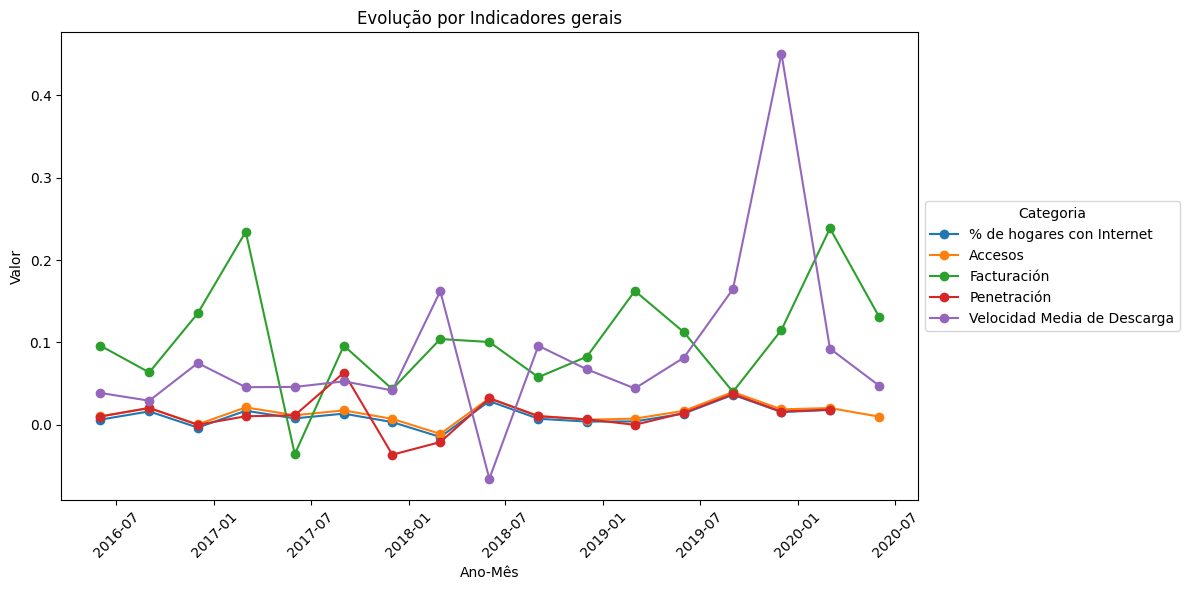

In [110]:


lst_grupos = ['Velocidad Media de Descarga', 
              'Penetración'                
             ,'Facturación'                
             ,'Accesos'                    
             ,r'% de hogares con Internet'  
]

fig, ax = plt.subplots(figsize=(12, 6))

# Filtrar os dados antes do loop (para performance e legibilidade)
df_filtrado = dfs['Acceso a internet en Argentina']
df_filtrado = df_filtrado[df_filtrado['Indicador'].isin(lst_grupos)]

# Garantir que a coluna de data seja datetime
df_filtrado['data'] = df_filtrado['data'].dt.to_timestamp()

# Ordenar por data
df_filtrado = df_filtrado.sort_values('data')


# Loop por categoria
for categoria, grupo in df_filtrado.groupby('Indicador'):
    ax.plot(grupo['data'], grupo['var_valor'], label=categoria, marker='o', linestyle='-')

ax.set_xlabel('Ano-Mês')
ax.set_ylabel('Valor')
ax.set_title('Evolução por Indicadores gerais')
ax.legend(title='Categoria')
plt.xticks(rotation=45)
ax.legend(title='Categoria', loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
plt.show()

/tmp/ipykernel_2292032/51161158.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['data'] = df_filtrado['data'].dt.to_timestamp()


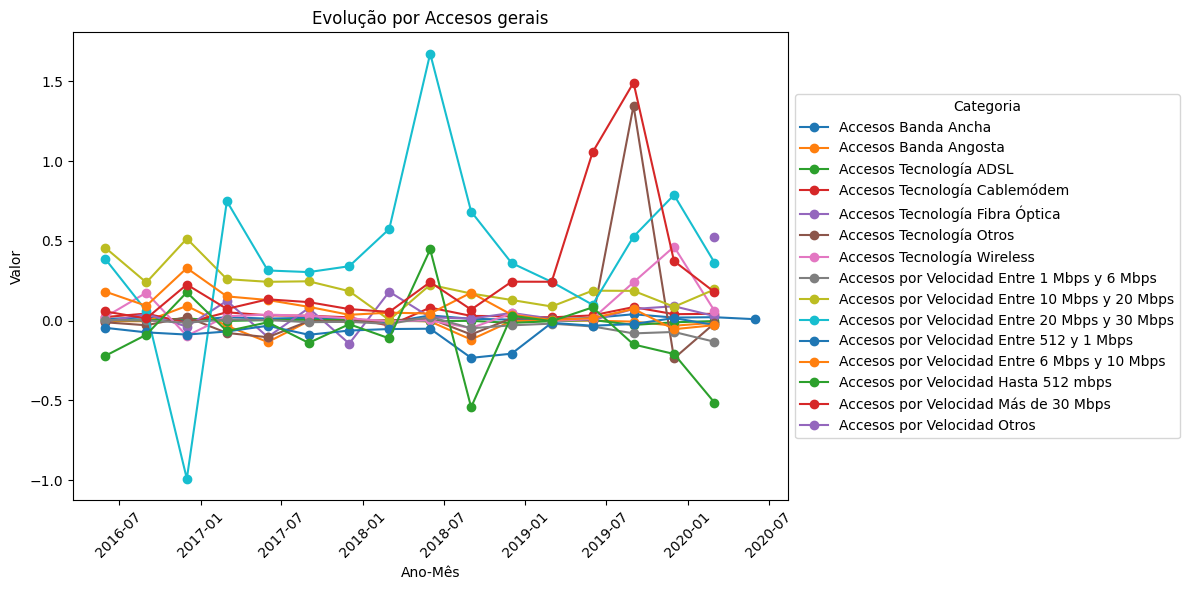

In [111]:
import matplotlib.pyplot as plt


lst_grupos = [
'Accesos por Velocidad Otros',                    
'Accesos por Velocidad Más de 30 Mbps',           
'Accesos por Velocidad Hasta 512 mbps',           
'Accesos por Velocidad Entre 6 Mbps y 10 Mbps',   
'Accesos por Velocidad Entre 512 y 1 Mbps',       
'Accesos por Velocidad Entre 20 Mbps y 30 Mbps',  
'Accesos por Velocidad Entre 10 Mbps y 20 Mbps',  
'Accesos por Velocidad Entre 1 Mbps y 6 Mbps',    
'Accesos Tecnología Wireless',                    
'Accesos Tecnología Otros',                       
'Accesos Tecnología Fibra Óptica',                
'Accesos Tecnología Cablemódem',                  
'Accesos Tecnología ADSL',                        
'Accesos Banda Angosta',                          
'Accesos Banda Ancha',                             
]

fig, ax = plt.subplots(figsize=(12, 6))

# Filtrar os dados antes do loop (para performance e legibilidade)
df_filtrado = dfs['Acceso a internet en Argentina']
df_filtrado = df_filtrado[df_filtrado['Indicador'].isin(lst_grupos)]

# Garantir que a coluna de data seja datetime
df_filtrado['data'] = df_filtrado['data'].dt.to_timestamp()

# Ordenar por data
df_filtrado = df_filtrado.sort_values('data')


# Loop por categoria
for categoria, grupo in df_filtrado.groupby('Indicador'):
    ax.plot(grupo['data'], grupo['var_valor'], label=categoria, marker='o', linestyle='-')

ax.set_xlabel('Ano-Mês')
ax.set_ylabel('Valor')
ax.set_title('Evolução por Accesos gerais')
ax.legend(title='Categoria')
plt.xticks(rotation=45)
ax.legend(title='Categoria', loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
plt.show()

/tmp/ipykernel_2292032/2919509566.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['data'] = df_filtrado['data'].dt.to_timestamp()


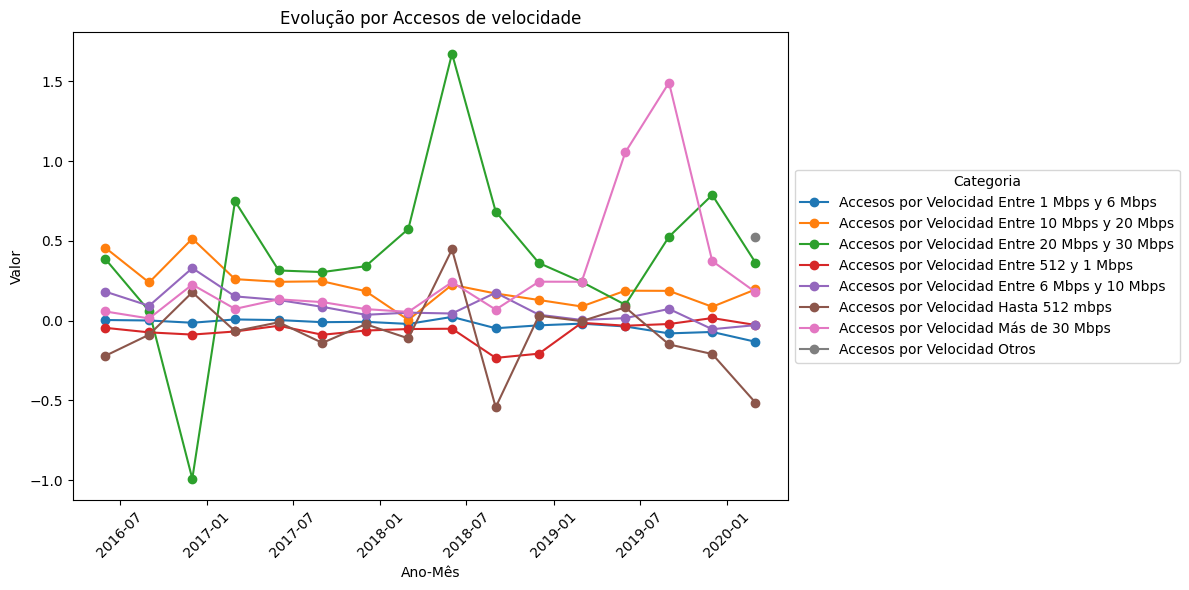

In [112]:
import matplotlib.pyplot as plt


lst_grupos = [
'Accesos por Velocidad Otros',                    
'Accesos por Velocidad Más de 30 Mbps',           
'Accesos por Velocidad Hasta 512 mbps',           
'Accesos por Velocidad Entre 6 Mbps y 10 Mbps',   
'Accesos por Velocidad Entre 512 y 1 Mbps',       
'Accesos por Velocidad Entre 20 Mbps y 30 Mbps',  
'Accesos por Velocidad Entre 10 Mbps y 20 Mbps',  
'Accesos por Velocidad Entre 1 Mbps y 6 Mbps',    
# 'Accesos Tecnología Wireless',                    
# 'Accesos Tecnología Otros',                       
# 'Accesos Tecnología Fibra Óptica',                
# 'Accesos Tecnología Cablemódem',                  
# 'Accesos Tecnología ADSL',                        
# 'Accesos Banda Angosta',                          
# 'Accesos Banda Ancha',                             
]

fig, ax = plt.subplots(figsize=(12, 6))

# Filtrar os dados antes do loop (para performance e legibilidade)
df_filtrado = dfs['Acceso a internet en Argentina']
df_filtrado = df_filtrado[df_filtrado['Indicador'].isin(lst_grupos)]

# Garantir que a coluna de data seja datetime
df_filtrado['data'] = df_filtrado['data'].dt.to_timestamp()

# Ordenar por data
df_filtrado = df_filtrado.sort_values('data')


# Loop por categoria
for categoria, grupo in df_filtrado.groupby('Indicador'):
    ax.plot(grupo['data'], grupo['var_valor'], label=categoria, marker='o', linestyle='-')

ax.set_xlabel('Ano-Mês')
ax.set_ylabel('Valor')
ax.set_title('Evolução por Accesos de velocidade')
ax.legend(title='Categoria')
plt.xticks(rotation=45)
ax.legend(title='Categoria', loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
plt.show()

/tmp/ipykernel_2292032/719645117.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['data'] = df_filtrado['data'].dt.to_timestamp()


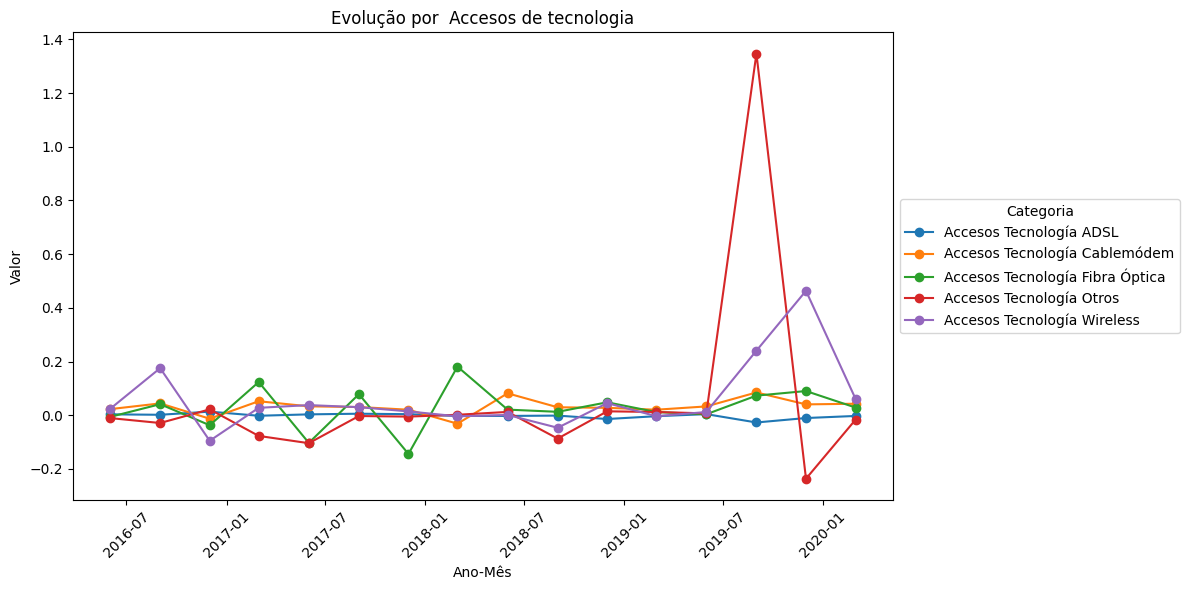

In [113]:
import matplotlib.pyplot as plt


lst_grupos = [
#'Accesos por Velocidad Otros',                    
#'Accesos por Velocidad Más de 30 Mbps',           
#'Accesos por Velocidad Hasta 512 mbps',           
#'Accesos por Velocidad Entre 6 Mbps y 10 Mbps',   
#'Accesos por Velocidad Entre 512 y 1 Mbps',       
#'Accesos por Velocidad Entre 20 Mbps y 30 Mbps',  
#'Accesos por Velocidad Entre 10 Mbps y 20 Mbps',  
#'Accesos por Velocidad Entre 1 Mbps y 6 Mbps',    
'Accesos Tecnología Wireless',                    
'Accesos Tecnología Otros',                       
'Accesos Tecnología Fibra Óptica',                
'Accesos Tecnología Cablemódem',                  
'Accesos Tecnología ADSL',                        
#'Accesos Banda Angosta',                          
#'Accesos Banda Ancha',                             
]

fig, ax = plt.subplots(figsize=(12, 6))

# Filtrar os dados antes do loop (para performance e legibilidade)
df_filtrado = dfs['Acceso a internet en Argentina']
df_filtrado = df_filtrado[df_filtrado['Indicador'].isin(lst_grupos)]

# Garantir que a coluna de data seja datetime
df_filtrado['data'] = df_filtrado['data'].dt.to_timestamp()

# Ordenar por data
df_filtrado = df_filtrado.sort_values('data')


# Loop por categoria
for categoria, grupo in df_filtrado.groupby('Indicador'):
    ax.plot(grupo['data'], grupo['var_valor'], label=categoria, marker='o', linestyle='-')

ax.set_xlabel('Ano-Mês')
ax.set_ylabel('Valor')
ax.set_title('Evolução por  Accesos de tecnologia')
ax.legend(title='Categoria')
plt.xticks(rotation=45)
ax.legend(title='Categoria', loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
plt.show()

/tmp/ipykernel_2292032/371198889.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['data'] = df_filtrado['data'].dt.to_timestamp()


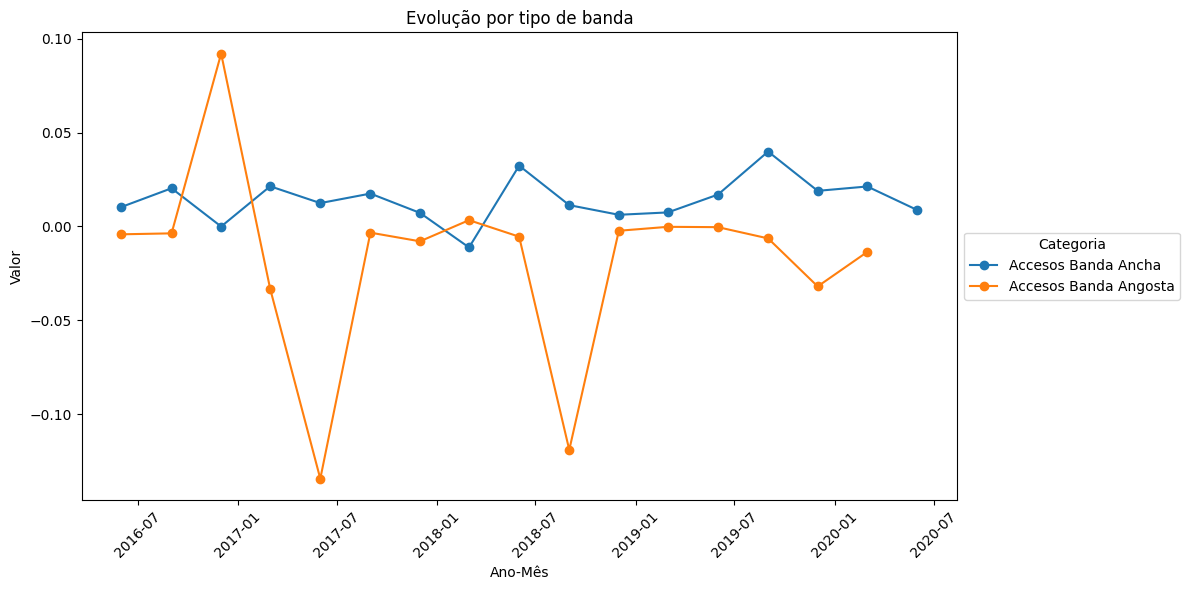

In [114]:
import matplotlib.pyplot as plt


lst_grupos = [
#'Accesos por Velocidad Otros',                    
#'Accesos por Velocidad Más de 30 Mbps',           
#'Accesos por Velocidad Hasta 512 mbps',           
#'Accesos por Velocidad Entre 6 Mbps y 10 Mbps',   
#'Accesos por Velocidad Entre 512 y 1 Mbps',       
#'Accesos por Velocidad Entre 20 Mbps y 30 Mbps',  
#'Accesos por Velocidad Entre 10 Mbps y 20 Mbps',  
#'Accesos por Velocidad Entre 1 Mbps y 6 Mbps',    
#'Accesos Tecnología Wireless',                    
#'Accesos Tecnología Otros',                       
#'Accesos Tecnología Fibra Óptica',                
#'Accesos Tecnología Cablemódem',                  
#'Accesos Tecnología ADSL',                        
'Accesos Banda Angosta',                          
'Accesos Banda Ancha',                             
]

fig, ax = plt.subplots(figsize=(12, 6))

# Filtrar os dados antes do loop (para performance e legibilidade)
df_filtrado = dfs['Acceso a internet en Argentina']
df_filtrado = df_filtrado[df_filtrado['Indicador'].isin(lst_grupos)]

# Garantir que a coluna de data seja datetime
df_filtrado['data'] = df_filtrado['data'].dt.to_timestamp()

# Ordenar por data
df_filtrado = df_filtrado.sort_values('data')


# Loop por categoria
for categoria, grupo in df_filtrado.groupby('Indicador'):
    ax.plot(grupo['data'], grupo['var_valor'], label=categoria, marker='o', linestyle='-')

ax.set_xlabel('Ano-Mês')
ax.set_ylabel('Valor')
ax.set_title('Evolução por tipo de banda')
ax.legend(title='Categoria')
plt.xticks(rotation=45)
ax.legend(title='Categoria', loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
plt.show()

In [42]:
dfs['Acceso a internet en Argentina'][dfs['Acceso a internet en Argentina']['Indicador'] == 'Accesos Tecnología Otros']

,Year,Month,Tipo,Pais,Servicio,Indicador,Valor,Unidad,month_num,lag_1,var_valor,data
260,2016,Marzo,Información Física,Argentina,Acceso a Internet Fija,Accesos Tecnología Otros,72930.0,NaN,3.0,NaN,NaN,2016-03
259,2016,Junio,Información Física,Argentina,Acceso a Internet Fija,Accesos Tecnología Otros,72148.0,NaN,6.0,72930.0,-0.010723,2016-06
258,2016,Septiembre,Información Física,Argentina,Acceso a Internet Fija,Accesos Tecnología Otros,70049.0,NaN,9.0,72148.0,-0.029093,2016-09
257,2016,Diciembre,Información Física,Argentina,Acceso a Internet Fija,Accesos Tecnología Otros,71573.0,NaN,12.0,70049.0,0.021756,2016-12
256,2017,Marzo,Información Física,Argentina,Acceso a Internet Fija,Accesos Tecnología Otros,66045.0,NaN,3.0,71573.0,-0.077236,2017-03
255,2017,Junio,Información Física,Argentina,Acceso a Internet Fija,Accesos Tecnología Otros,59157.0,NaN,6.0,66045.0,-0.104293,2017-06
254,2017,Septiembre,Información Física,Argentina,Acceso a Internet Fija,Accesos Tecnología Otros,58976.0,NaN,9.0,59157.0,-0.003060,2017-09
253,2017,Diciembre,Información Física,Argentina,Acceso a Internet Fija,Accesos Tecnología Otros,58668.0,NaN,12.0,58976.0,-0.005222,2017-12
252,2018,Marzo,Información Física,Argentina,Acceso a Internet Fija,Accesos Tecnología Otros,58763.0,NaN,3.0,58668.0,0.001619,2018-03
251,2018,Junio,Información Física,Argentina,Acceso a Internet Fija,Accesos Tecnología Otros,59482.0,NaN,6.0,58763.0,0.012236,2018-06


### Tab Mercados Navegados

In [166]:
# Remoção valores ausentes na coluna 'Country Name' da aba 'Mercados Navegando'
dfs['Mercados Navegando'].dropna(subset=['Country Name'], inplace=True)
dfs['Mercados Navegando'].sample(14)

,Country Name,Inversion Inicial [M usd],Margen Neto [%],Share de Mercado Navegando [%],key_CN
1,España,149,0.09,0.18,espana
3,India,408,0.07,0.28,india
9,Japon,149,0.03,0.12,japon
4,Australia,139,0.06,0.09,australia
12,Sudafrica,231,0.11,0.46,sudafrica
10,Mongolia,136,0.08,0.21,mongolia
5,Nueva Zelanda,60,0.09,0.12,nueva zelanda
11,Marruecos,149,0.09,0.26,marruecos
13,Reino Unido,188,0.04,0.19,reino unido
6,Alemania,216,0.04,0.25,alemania


In [ ]:
# configurar nome do país
dfs['Mercados Navegando']['Country Name'] = dfs['Mercados Navegando']['Country Name'].replace('Nueva Zelanda', 'Nueva Zelandia')

In [193]:

def normalizar_texto(texto):
    if pd.isnull(texto):
        return ''
    texto = str(texto).strip().lower()  # remover espaços e colocar minúsculas
    texto = unicodedata.normalize('NFD', texto).encode('ascii', 'ignore').decode('utf-8')  # remover acentos
    return texto

dfs['Mercados Navegando']['key_CN'] = dfs['Mercados Navegando']['Country Name'].apply(normalizar_texto)
dfs['Países']['key_CN'] = dfs['Países']['Country Name'].apply(normalizar_texto)

df_enriq = dfs['Mercados Navegando'].merge(dfs['Países'], how='left', on='key_CN')
df_enriq.head(30)

/tmp/ipykernel_2292032/2737430658.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['Países']['key_CN'] = dfs['Países']['Country Name'].apply(normalizar_texto)


,Country Name_x,Inversion Inicial [M usd],Margen Neto [%],Share de Mercado Navegando [%],key_CN,Country Name_y,Country Code,Region,Income_Group,Codigo Moneda
0,Estados Unidos,178,0.05,0.08,estados unidos,Estados Unidos,USA,NaN,Ingreso alto,NaN
1,España,149,0.09,0.18,espana,España,ESP,NaN,Ingreso alto,NaN
2,Italia,158,0.10,0.22,italia,Italia,ITA,NaN,Ingreso alto,NaN
3,India,408,0.07,0.28,india,India,IND,Asia meridional,Países de ingreso mediano bajo,NaN
4,Australia,139,0.06,0.09,australia,Australia,AUS,NaN,Ingreso alto,NaN
5,Nueva Zelandia,60,0.09,0.12,nueva zelandia,Nueva Zelandia,NZL,NaN,Ingreso alto,NaN
6,Alemania,216,0.04,0.25,alemania,Alemania,DEU,NaN,Ingreso alto,NaN
7,Canada,256,0.05,0.19,canada,Canadá,CAN,NaN,Ingreso alto,NaN
8,Israel,18,0.06,0.04,israel,Israel,ISR,NaN,Ingreso alto,NaN
9,Japon,149,0.03,0.12,japon,Japón,JPN,NaN,Ingreso alto,NaN


In [221]:
df_agg_navegacao = df_enriq.groupby('Income_Group').agg(Qtd=('Margen Neto [%]', 'count'),
    Margen_Mean=('Margen Neto [%]', 'mean'),
    Share_Mean=('Share de Mercado Navegando [%]', 'mean'),
    Inv_Ini_Mean=('Inversion Inicial [M usd]', 'mean')).reset_index()
df_agg_navegacao

,Income_Group,Qtd,Margen_Mean,Share_Mean,Inv_Ini_Mean
0,Ingreso alto,10,0.061,0.148,151.1
1,Ingreso mediano alto,1,0.110,0.460,231.0
2,Países de ingreso mediano bajo,3,0.080,0.250,231.0


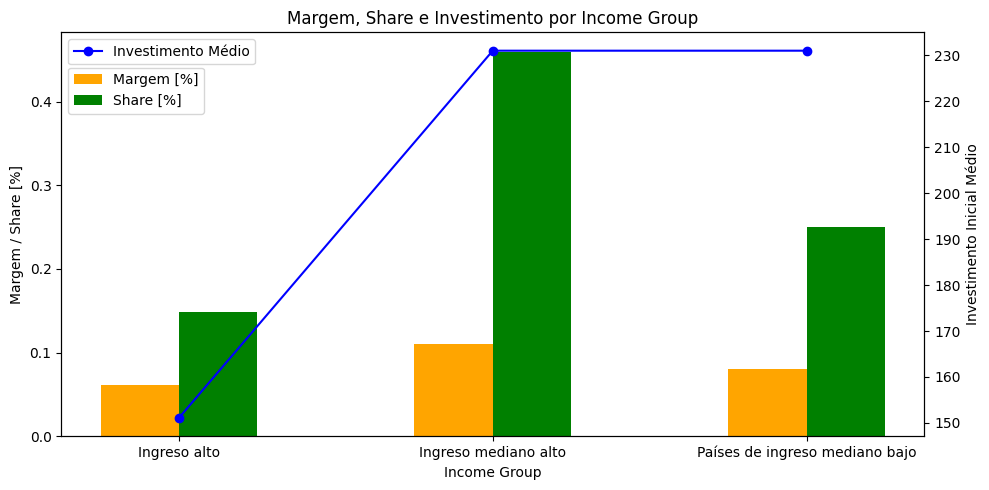

In [238]:
# Posições no eixo X
x = np.arange(len(df_agg_navegacao['Income_Group']))
largura = 0.25

# Criar a figura e o primeiro eixo
fig, ax1 = plt.subplots(figsize=(10, 5))

# Barras no primeiro eixo (margem e share)
ax1.bar(x, df_agg_navegacao['Margen_Mean'], width=largura, label='Margem [%]', color='orange')
ax1.bar(x + largura, df_agg_navegacao['Share_Mean'], width=largura, label='Share [%]', color='green')

# Eixo X
ax1.set_xticks(x + largura / 2)
ax1.set_xticklabels(df_agg_navegacao['Income_Group'])
ax1.set_xlabel('Income Group')
ax1.set_ylabel('Margem / Share [%]')
ax1.legend(loc='upper left', bbox_to_anchor=(0, 0.93))

# Segundo eixo Y
ax2 = ax1.twinx()
ax2.plot(x + largura / 2, df_agg_navegacao['Inv_Ini_Mean'], color='blue', marker='o', label='Investimento Médio')

# Eixo Y da direita
ax2.set_ylabel('Investimento Inicial Médio')
ax2.legend(loc='upper left')

# Título
plt.title('Margem, Share e Investimento por Income Group')
plt.tight_layout()
plt.show()

### Tab Usuarios de internet global

In [30]:
dfs['Usuarios de internet global'].shape

(5220, 4)

In [156]:
dfs['Usuarios de internet global'].sample(10)

,Country Name,Country Code,Año,Porcentaje
3025,Malí,MLI,2011,1.800000
2438,Groenlandia,GRL,2009,61.070000
4109,posterior al dividendo demográfico,PST,2015,75.746087
4197,Bahamas,BHS,2016,76.920000
3461,España,ESP,2013,67.089999
1174,Santa Lucía,LCA,2004,14.641836
217,República Eslovaca,SVK,2000,2.689810
3397,Andorra,AND,2013,81.000000
2457,No clasificado,INX,2009,NaN
4270,"Hong Kong, Región Administrativa Especial",HKG,2016,79.866270


In [240]:
df_enriq_paises_glob = dfs['Usuarios de internet global'].merge(dfs['Países'], how='left', on='Country Code')
df_enriq_paises_glob

,Country Name_x,Country Code,Año,Porcentaje,Country Name_y,Region,Income_Group,Codigo Moneda,key_CN
0,Aruba,ABW,2000,NaN,Aruba,NaN,Ingreso alto,NaN,aruba
1,Afganistán,AFG,2000,NaN,Afganistán,Asia meridional,Países de ingreso bajo,NaN,afganistan
2,Angola,AGO,2000,0.018454,Angola,África al sur del Sahara (excluido altos ingre...,Países de ingreso mediano bajo,NaN,angola
3,Albania,ALB,2000,0.065027,Albania,Europa y Asia central (excluido altos ingresos),Ingreso mediano alto,NaN,albania
4,Andorra,AND,2000,6.886209,Andorra,NaN,Ingreso alto,NaN,andorra
...,...,...,...,...,...,...,...,...,...
5215,Kosovo,XKX,2019,83.893597,Kosovo,Europa y Asia central (excluido altos ingresos),Ingreso mediano alto,NaN,kosovo
5216,"Yemen, Rep. del",YEM,2019,26.718355,"Yemen, Rep. del",Oriente Medio y Norte de África (excluido alto...,Países de ingreso bajo,NaN,"yemen, rep. del"
5217,Sudáfrica,ZAF,2019,56.167394,Sudáfrica,África al sur del Sahara (excluido altos ingre...,Ingreso mediano alto,NaN,sudafrica
5218,Zambia,ZMB,2019,27.852579,Zambia,África al sur del Sahara (excluido altos ingre...,Países de ingreso mediano bajo,NaN,zambia


/tmp/ipykernel_2292032/1433179696.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_regiao, y='Region', x='Porcentaje', palette='viridis')


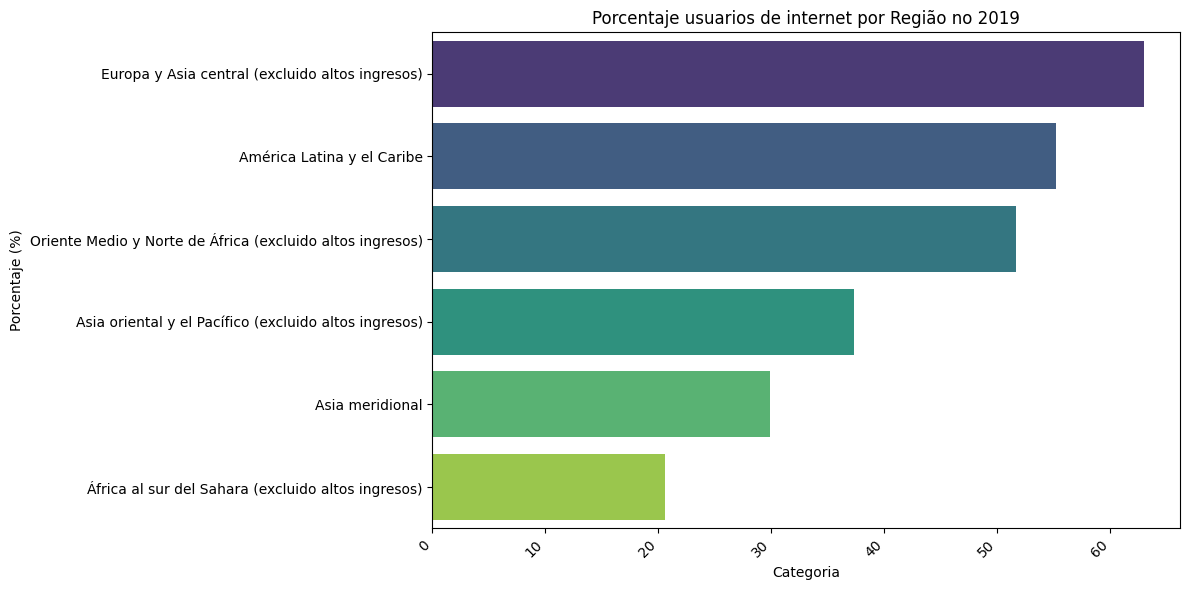

In [331]:
df_regiao = df_enriq_paises_glob[df_enriq_paises_glob['Año']==2019].groupby('Region')['Porcentaje'].mean().reset_index().sort_values(by='Porcentaje',ascending=False)
# Plotar
plt.figure(figsize=(12, 6))
sns.barplot(data=df_regiao, y='Region', x='Porcentaje', palette='viridis')
plt.title(f'Porcentaje usuarios de internet por Região no 2019')
plt.xlabel('Categoria')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

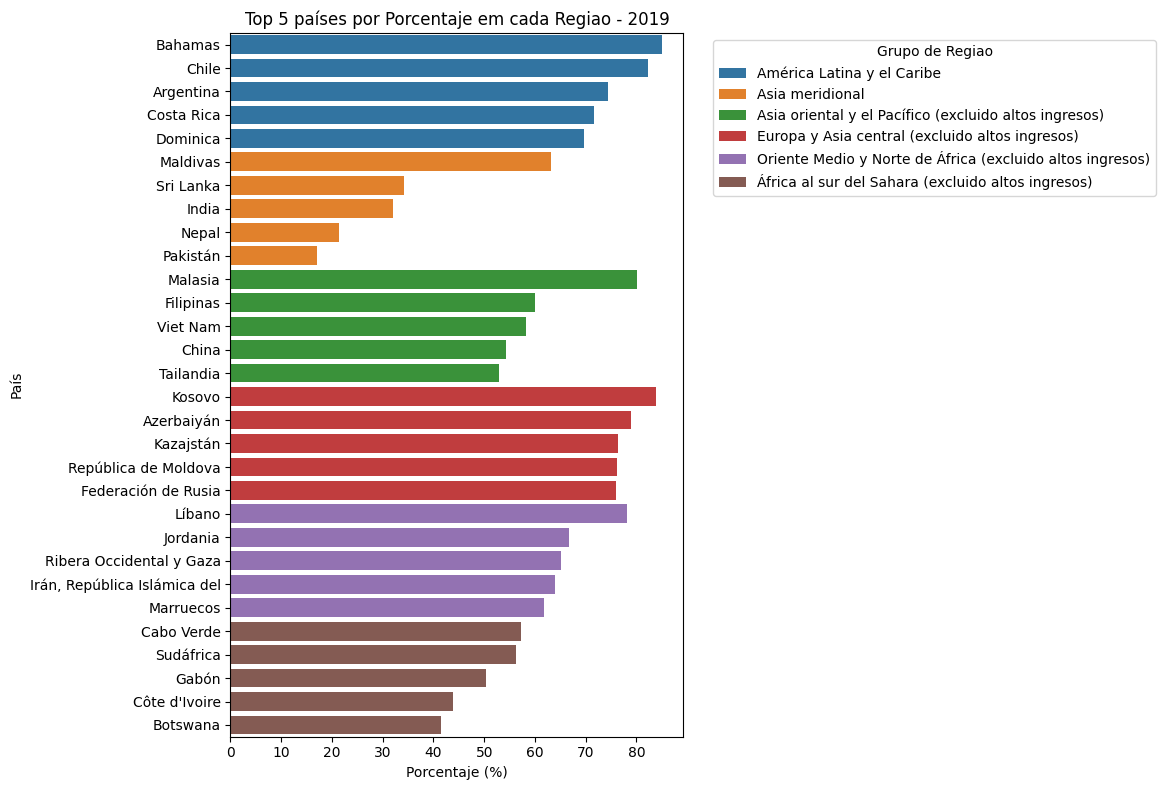

In [318]:
# Paises que tem uma porcentagem alta de usuarios de internet (Demanda maior )
df_enrique_2019 = df_enriq_paises_glob.loc[df_enriq_paises_glob['Año']==2019, ['Country Name_x', 
                                                             'Country Code',
                                                             'Año',
                                                             'Porcentaje',
                                                             'Region',
                                                             'Income_Group']]


top5_por_grupo = df_enrique_2019.groupby('Region', group_keys=False).apply(
    lambda x: x.nlargest(5, 'Porcentaje')
)

# Ordenar para o gráfico
top5 = top5_por_grupo.sort_values(['Region', 'Porcentaje'], ascending=[True, False])

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=top5, x='Porcentaje', y='Country Name_x', hue='Region')

# Títulos e rótulos
plt.title('Top 5 países por Porcentaje em cada Regiao - 2019')
plt.xlabel('Porcentaje (%)')
plt.ylabel('País')
plt.legend(title='Grupo de Regiao', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# % crescimento mais rapido ultimos 3 anos


# Grupo de Icome Group



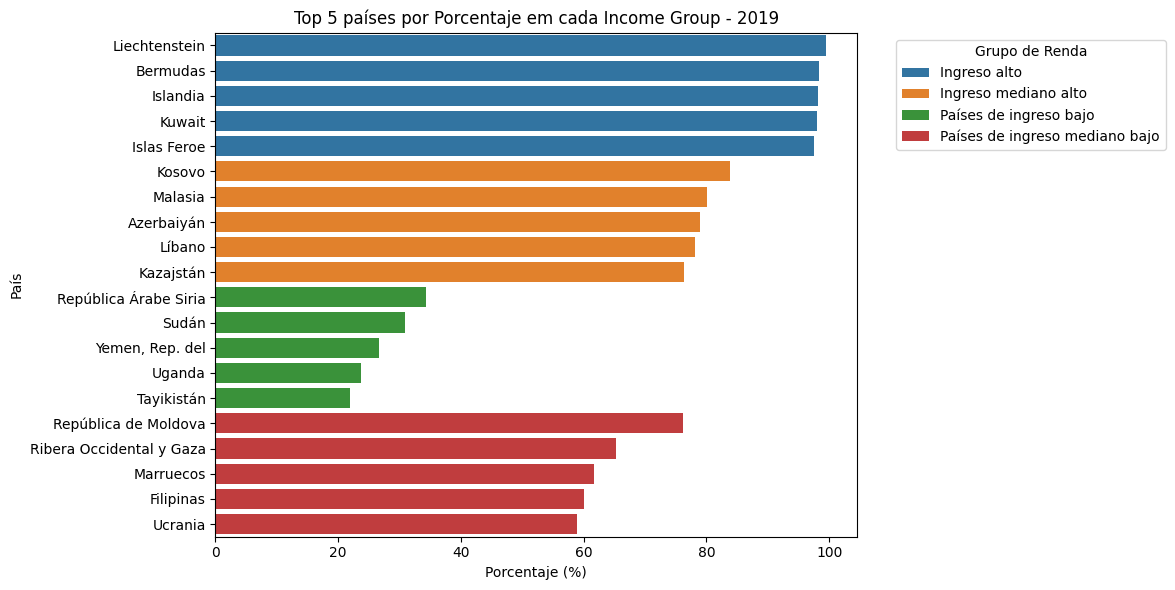

In [ ]:
# Paises que tem uma porcentagem alta de usuarios de internet (Demanda maior )
df_enrique_2019 = df_enriq_paises_glob.loc[df_enriq_paises_glob['Año']==2019, ['Country Name_x', 
                                                             'Country Code',
                                                             'Año',
                                                             'Porcentaje',
                                                             'Region',
                                                             'Income_Group']]

df_enrique_2019 = df_enrique_2019[df_enrique_2019['Income_Group'] != 'Agregados']

top5_por_grupo = df_enrique_2019.groupby('Income_Group', group_keys=False).apply(
    lambda x: x.nlargest(5, 'Porcentaje')
)

# Ordenar para o gráfico
top5 = top5_por_grupo.sort_values(['Income_Group', 'Porcentaje'], ascending=[True, False])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top5, x='Porcentaje', y='Country Name_x', hue='Income_Group')

# Títulos e rótulos
plt.title('Top 5 países por Porcentaje em cada Income Group - 2019')
plt.xlabel('Porcentaje (%)')
plt.ylabel('País')
plt.legend(title='Grupo de Renda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




In [321]:
top5[top5['Country Name_x']=='Argentina']

,Country Name_x,Country Code,Año,Porcentaje,Region,Income_Group
4966,Argentina,ARG,2019,74.294907,América Latina y el Caribe,Ingreso mediano alto


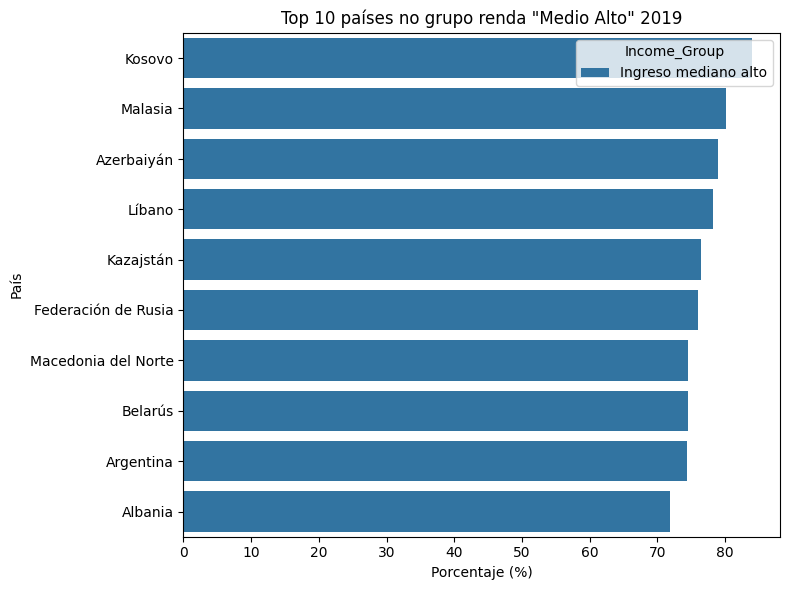

In [330]:

plt.figure(figsize=(8,6))
df_2019_renda_med_alto = df_enrique_2019[df_enrique_2019['Income_Group']=='Ingreso mediano alto'].sort_values(by='Porcentaje', ascending=False).head(10)
sns.barplot(data=df_2019_renda_med_alto, x='Porcentaje', y='Country Name_x', hue='Income_Group')

# Títulos e rótulos
plt.title('Top 10 países no grupo renda "Medio Alto" 2019')
plt.xlabel('Porcentaje (%)')
plt.ylabel('País')
# plt.legend(title='Grupo de Renda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [332]:
df_enriq_paises_glob[df_enriq_paises_glob['Country Name_x'].str.contains('Argentina')].head()

,Country Name_x,Country Code,Año,Porcentaje,Country Name_y,Region,Income_Group,Codigo Moneda,key_CN
7,Argentina,ARG,2000,0.830767,Argentina,América Latina y el Caribe,Ingreso mediano alto,Argentina (ARS),argentina
268,Argentina,ARG,2001,3.284482,Argentina,América Latina y el Caribe,Ingreso mediano alto,Argentina (ARS),argentina
529,Argentina,ARG,2002,7.038683,Argentina,América Latina y el Caribe,Ingreso mediano alto,Argentina (ARS),argentina
790,Argentina,ARG,2003,9.780807,Argentina,América Latina y el Caribe,Ingreso mediano alto,Argentina (ARS),argentina
1051,Argentina,ARG,2004,10.882124,Argentina,América Latina y el Caribe,Ingreso mediano alto,Argentina (ARS),argentina


In [370]:

# Calculo de variação percentual
df_enriq_paises_glob['lag_1'] = np.nan
for indicador in df_enriq_paises_glob['Country Name_x'].unique():

    indexs_test = df_enriq_paises_glob[df_enriq_paises_glob['Country Name_x']==indicador].sort_values(by=['Año']).index
    df_enriq_paises_glob['lag_1'][indexs_test] = df_enriq_paises_glob[
        df_enriq_paises_glob['Country Name_x']==indicador
        ].sort_values(by=['Año'])['Porcentaje'].shift(1)

# variação percentual
df_enriq_paises_glob['var_prc'] = df_enriq_paises_glob['Porcentaje'] / df_enriq_paises_glob['lag_1'] - 1
df_enriq_paises_glob

# Calculo de variação percentual lag 2
df_enriq_paises_glob['var_prc_l2'] = np.nan
for indicador in df_enriq_paises_glob['Country Name_x'].unique():

    indexs_test = df_enriq_paises_glob[df_enriq_paises_glob['Country Name_x']==indicador].sort_values(by=['Año']).index
    df_enriq_paises_glob['var_prc_l2'][indexs_test] = df_enriq_paises_glob[
        df_enriq_paises_glob['Country Name_x']==indicador
        ].sort_values(by=['Año'])['var_prc'].shift(1)

# Calculo de variação percentual lag 3
df_enriq_paises_glob['var_prc_l3'] = np.nan
for indicador in df_enriq_paises_glob['Country Name_x'].unique():

    indexs_test = df_enriq_paises_glob[df_enriq_paises_glob['Country Name_x']==indicador].sort_values(by=['Año']).index
    df_enriq_paises_glob['var_prc_l3'][indexs_test] = df_enriq_paises_glob[
        df_enriq_paises_glob['Country Name_x']==indicador
        ].sort_values(by=['Año'])['var_prc'].shift(2)

df_enriq_paises_glob['mean_var_prc_3_anos'] = df_enriq_paises_glob[['var_prc', 'var_prc_l3', 'var_prc_l3']].mean(axis=1)
df_enriquecido_2029_calc = df_enriq_paises_glob[(df_enriq_paises_glob['Año']==2019)&(df_enriq_paises_glob['Income_Group']!='Agregados')].sort_values(by='mean_var_prc_3_anos', ascending=False)

/tmp/ipykernel_2292032/357437700.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enriq_paises_glob['lag_1'][indexs_test] = df_enriq_paises_glob[
/tmp/ipykernel_2292032/357437700.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enriq_paises_glob['lag_1'][indexs_test] = df_enriq_paises_glob[
/tmp/ipykernel_2292032/357437700.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enriq_paises_glob['lag_1'][indexs_test] = df_en

In [371]:
df_enriquecido_2029_calc.head()

,Country Name_x,Country Code,Año,Porcentaje,Country Name_y,Region,Income_Group,Codigo Moneda,key_CN,lag_1,var_prc,var_prc_l2,var_prc_l3,mean_var_prc_3_anos
5087,Liberia,LBR,2019,7.984480,Liberia,África al sur del Sahara (excluido altos ingre...,Países de ingreso bajo,NaN,liberia,7.319106,0.090909,-0.778209,5.099815,3.430180
5070,Iraq,IRQ,2019,49.359999,Iraq,Oriente Medio y Norte de África (excluido alto...,Ingreso mediano alto,NaN,iraq,21.230000,1.325012,-0.633966,3.390613,2.702079
4973,Burundi,BDI,2019,2.660749,Burundi,África al sur del Sahara (excluido altos ingre...,Países de ingreso bajo,NaN,burundi,5.173627,-0.485709,0.063171,2.526250,1.522263
5200,Tanzanía,TZA,2019,15.999999,Tanzanía,África al sur del Sahara (excluido altos ingre...,Países de ingreso mediano bajo,NaN,tanzania,13.504233,0.184814,-0.324788,1.857143,1.299700
5013,Djibouti,DJI,2019,55.681409,Djibouti,Oriente Medio y Norte de África (excluido alto...,Países de ingreso mediano bajo,NaN,djibouti,13.134915,3.239191,0.101698,0.113206,1.155201


In [372]:
df_enriquecido_2029_calc[['Country Name_x', 'Country Code', 'Año', 'Porcentaje',
       'Region', 'Income_Group', 'Codigo Moneda', 'var_prc',
       'var_prc_l2', 'var_prc_l3', 'mean_var_prc_3_anos']].head(40)

,Country Name_x,Country Code,Año,Porcentaje,Region,Income_Group,Codigo Moneda,var_prc,var_prc_l2,var_prc_l3,mean_var_prc_3_anos
5087,Liberia,LBR,2019,7.984480,África al sur del Sahara (excluido altos ingre...,Países de ingreso bajo,NaN,0.090909,-0.778209,5.099815,3.430180
5070,Iraq,IRQ,2019,49.359999,Oriente Medio y Norte de África (excluido alto...,Ingreso mediano alto,NaN,1.325012,-0.633966,3.390613,2.702079
4973,Burundi,BDI,2019,2.660749,África al sur del Sahara (excluido altos ingre...,Países de ingreso bajo,NaN,-0.485709,0.063171,2.526250,1.522263
5200,Tanzanía,TZA,2019,15.999999,África al sur del Sahara (excluido altos ingre...,Países de ingreso mediano bajo,NaN,0.184814,-0.324788,1.857143,1.299700
5013,Djibouti,DJI,2019,55.681409,Oriente Medio y Norte de África (excluido alto...,Países de ingreso mediano bajo,NaN,3.239191,0.101698,0.113206,1.155201
5128,Níger,NER,2019,10.224312,África al sur del Sahara (excluido altos ingre...,Países de ingreso bajo,NaN,1.365229,0.745708,0.983077,1.110461
4998,Côte d'Ivoire,CIV,2019,43.839921,África al sur del Sahara (excluido altos ingre...,Países de ingreso mediano bajo,NaN,0.063874,0.072004,0.994373,0.684207
4975,Benin,BEN,2019,14.119012,África al sur del Sahara (excluido altos ingre...,Países de ingreso mediano bajo,NaN,0.177168,0.065665,0.875831,0.642944
5120,Mozambique,MOZ,2019,20.774000,África al sur del Sahara (excluido altos ingre...,Países de ingreso bajo,NaN,0.185647,0.034707,0.833365,0.617459
5029,Etiopía,ETH,2019,18.618051,África al sur del Sahara (excluido altos ingre...,Países de ingreso bajo,NaN,0.211567,0.109111,0.799373,0.603438


/tmp/ipykernel_2292032/3522449143.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_regiao, y='Region', x='mean_var_prc_3_anos', palette='viridis')


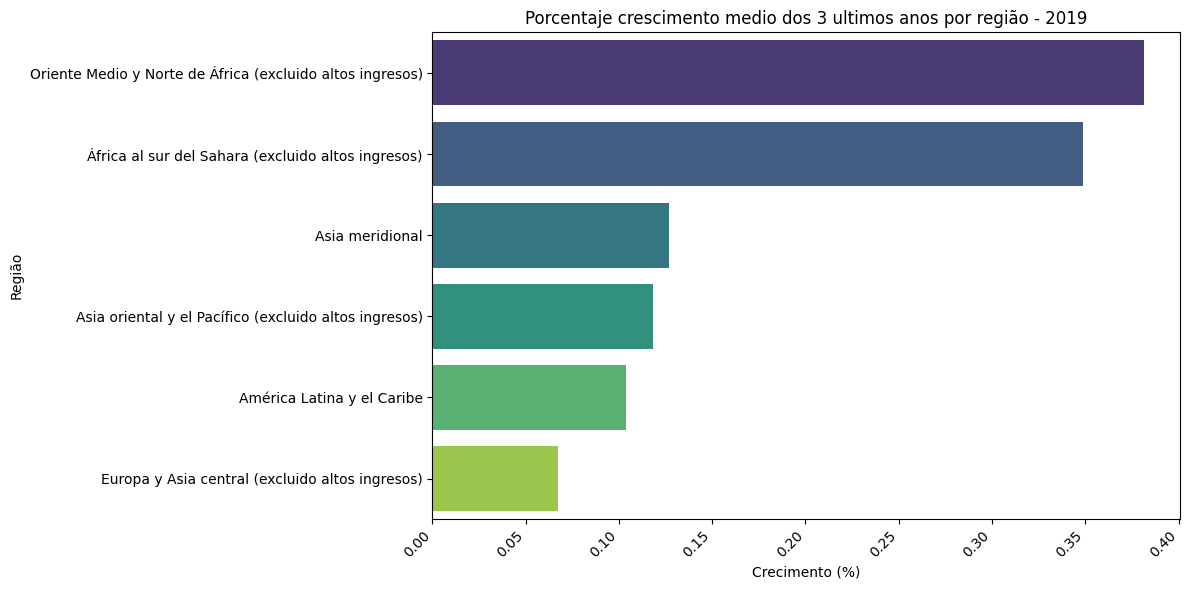

In [375]:
df_regiao = df_enriquecido_2029_calc.groupby('Region')['mean_var_prc_3_anos'].mean().reset_index().sort_values(by='mean_var_prc_3_anos',ascending=False)
# Plotar
plt.figure(figsize=(12, 6))
sns.barplot(data=df_regiao, y='Region', x='mean_var_prc_3_anos', palette='viridis')
plt.title(f'Porcentaje crescimento medio dos 3 ultimos anos por região - 2019')
plt.xlabel('Crecimento (%)')
plt.ylabel('Região')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

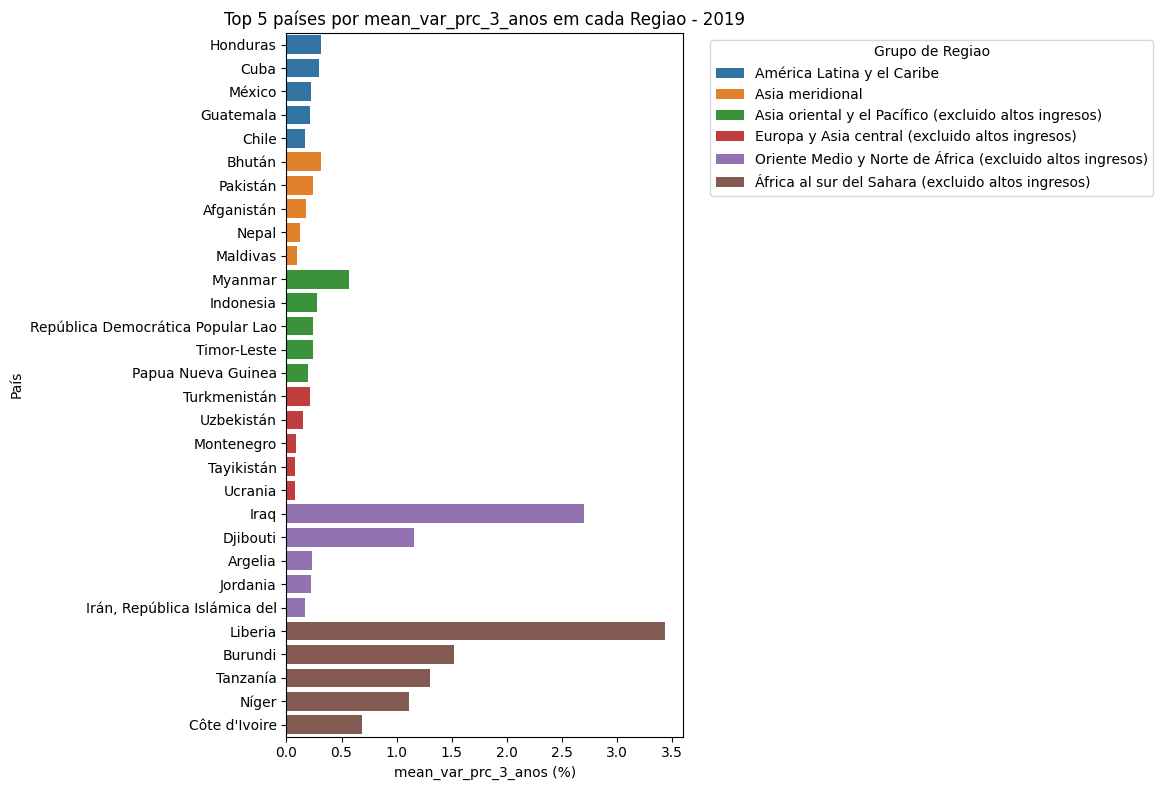

In [376]:
# Paises que tem uma porcentagem de crescimento alto de usuarios 
top5_por_grupo = df_enriquecido_2029_calc.groupby('Region', group_keys=False).apply(
    lambda x: x.nlargest(5, 'mean_var_prc_3_anos')
)

# Ordenar para o gráfico
top5 = top5_por_grupo.sort_values(['Region', 'mean_var_prc_3_anos'], ascending=[True, False])

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=top5, x='mean_var_prc_3_anos', y='Country Name_x', hue='Region')

# Títulos e rótulos
plt.title('Top 5 países por mean_var_prc_3_anos em cada Regiao - 2019')
plt.xlabel('mean_var_prc_3_anos (%)')
plt.ylabel('País')
plt.legend(title='Grupo de Regiao', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# % crescimento mais rapido ultimos 3 anos


# Grupo de Icome Group



In [379]:
df_enriquecido_2029_calc.head()

,Country Name_x,Country Code,Año,Porcentaje,Country Name_y,Region,Income_Group,Codigo Moneda,key_CN,lag_1,var_prc,var_prc_l2,var_prc_l3,mean_var_prc_3_anos
5087,Liberia,LBR,2019,7.984480,Liberia,África al sur del Sahara (excluido altos ingre...,Países de ingreso bajo,NaN,liberia,7.319106,0.090909,-0.778209,5.099815,3.430180
5070,Iraq,IRQ,2019,49.359999,Iraq,Oriente Medio y Norte de África (excluido alto...,Ingreso mediano alto,NaN,iraq,21.230000,1.325012,-0.633966,3.390613,2.702079
4973,Burundi,BDI,2019,2.660749,Burundi,África al sur del Sahara (excluido altos ingre...,Países de ingreso bajo,NaN,burundi,5.173627,-0.485709,0.063171,2.526250,1.522263
5200,Tanzanía,TZA,2019,15.999999,Tanzanía,África al sur del Sahara (excluido altos ingre...,Países de ingreso mediano bajo,NaN,tanzania,13.504233,0.184814,-0.324788,1.857143,1.299700
5013,Djibouti,DJI,2019,55.681409,Djibouti,Oriente Medio y Norte de África (excluido alto...,Países de ingreso mediano bajo,NaN,djibouti,13.134915,3.239191,0.101698,0.113206,1.155201


In [380]:
df_enriquecido_2029_calc['Region'].unique()

array(['África al sur del Sahara (excluido altos ingresos)',
       'Oriente Medio y Norte de África (excluido altos ingresos)',
       'Asia oriental y el Pacífico (excluido altos ingresos)',
       'Asia meridional', 'América Latina y el Caribe',
       'Europa y Asia central (excluido altos ingresos)', nan],
      dtype=object)

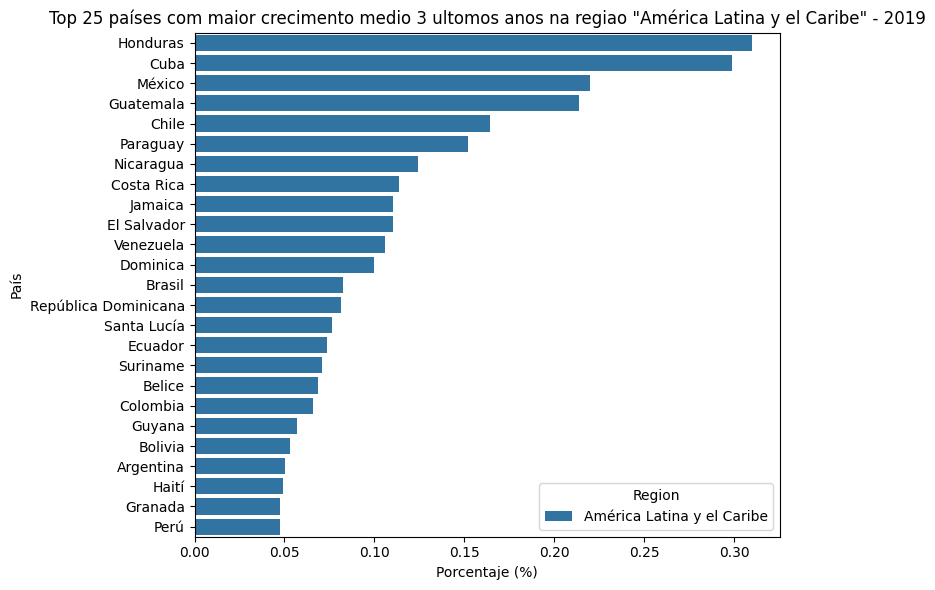

In [ ]:

plt.figure(figsize=(8,6))
df_2019_renda_med_alto = df_enriquecido_2029_calc[df_enriquecido_2029_calc['Region']=='América Latina y el Caribe'
                                                  ].sort_values(by='mean_var_prc_3_anos', ascending=False).head(25)
sns.barplot(data=df_2019_renda_med_alto, x='mean_var_prc_3_anos', y='Country Name_x', hue='Region')

# Títulos e rótulos
plt.title('Top 25 países com maior crecimento medio 3 ultomos anos na regiao "América Latina y el Caribe" - 2019')
plt.xlabel('Porcentaje (%)')
plt.ylabel('País')
# plt.legend(title='Grupo de Renda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

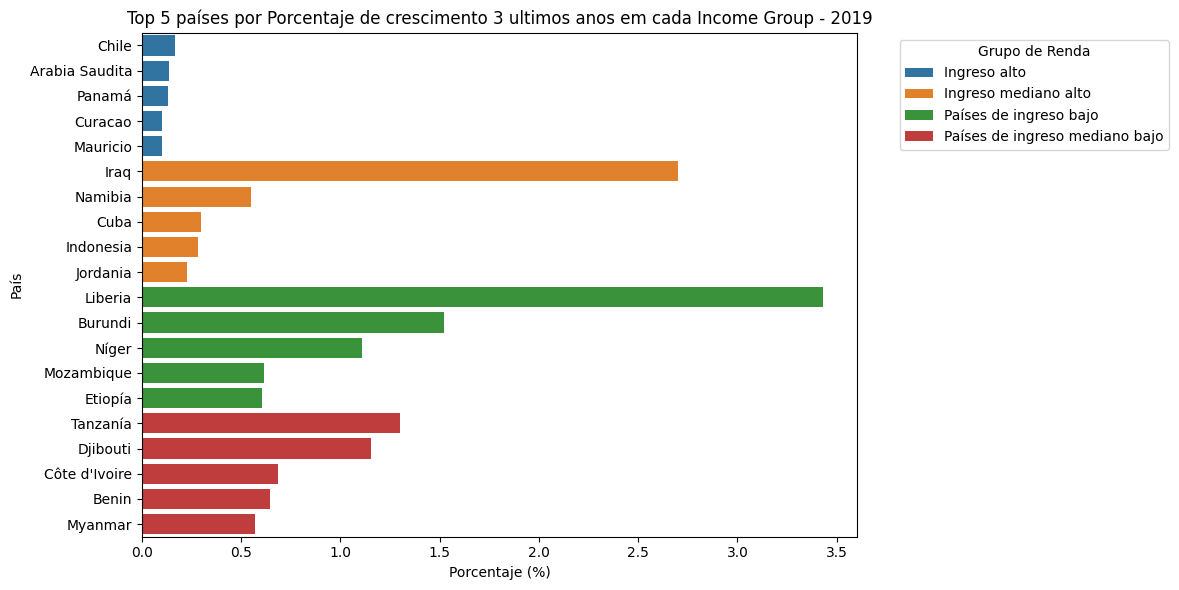

In [393]:
# Paises que tem uma porcentagem alta de usuarios de internet (Demanda maior )
df_enrique_2019 = df_enriquecido_2029_calc[df_enriquecido_2029_calc['Income_Group'] != 'Agregados']

top5_por_grupo = df_enrique_2019.groupby('Income_Group', group_keys=False).apply(
    lambda x: x.nlargest(5, 'mean_var_prc_3_anos')
)

# Ordenar para o gráfico
top5 = top5_por_grupo.sort_values(['Income_Group', 'mean_var_prc_3_anos'], ascending=[True, False])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top5, x='mean_var_prc_3_anos', y='Country Name_x', hue='Income_Group')

# Títulos e rótulos
plt.title('Top 5 países por Porcentaje de crescimento 3 ultimos anos em cada Income Group - 2019')
plt.xlabel('Porcentaje (%)')
plt.ylabel('País')
plt.legend(title='Grupo de Renda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# % crescimento mais rapido ultimos 3 anos


# Grupo de Icome Group



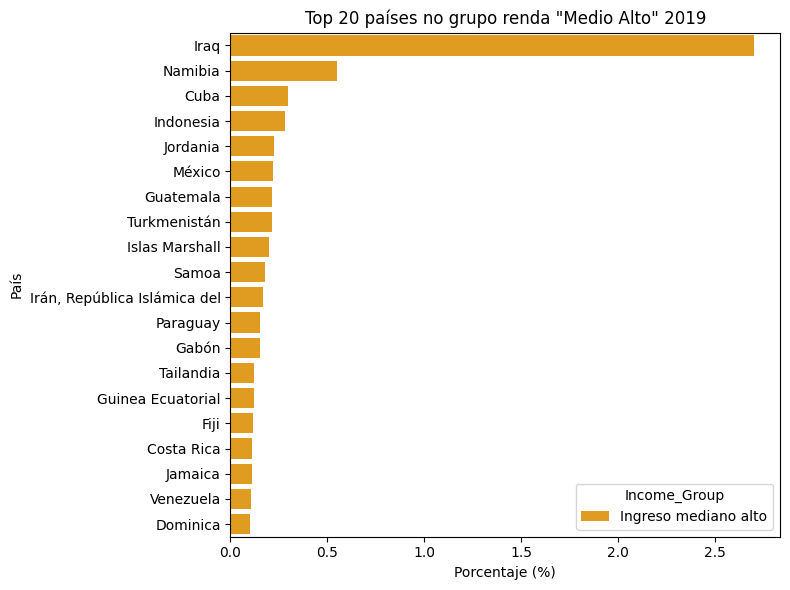

In [414]:

plt.figure(figsize=(8,6))
df_2019_renda_med_alto = df_enriquecido_2029_calc[df_enriquecido_2029_calc['Income_Group']=='Ingreso mediano alto'].sort_values(by='mean_var_prc_3_anos', ascending=False).head(20)
sns.barplot(data=df_2019_renda_med_alto, x='mean_var_prc_3_anos', y='Country Name_x', hue='Income_Group', palette={'Ingreso mediano alto': 'orange'})

# Títulos e rótulos
plt.title('Top 20 países no grupo renda "Medio Alto" 2019')
plt.xlabel('Porcentaje (%)')
plt.ylabel('País')
plt.tight_layout()
plt.show()

### Tab Población mundial

In [415]:
dfs['Población mundial'].shape

(259, 24)

In [422]:
dfs['Población mundial'].sample(14)

,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
91,Guam,GUM,"Población, total",1.601880e+05,1.615240e+05,1.625630e+05,1.633850e+05,1.640040e+05,1.644300e+05,1.646750e+05,1.647630e+05,1.647250e+05,1.645800e+05,1.649050e+05,1.656490e+05,1.663920e+05,1.670540e+05,1.675430e+05,1.679780e+05,1.683460e+05,1.686060e+05,1.686780e+05,1.686240e+05,1.692310e+05
145,República de Moldova,MDA,"Población, total",2.924668e+06,2.918135e+06,2.911385e+06,2.903198e+06,2.896023e+06,2.888985e+06,2.880967e+06,2.874299e+06,2.868833e+06,2.865213e+06,2.862354e+06,2.860699e+06,2.860324e+06,2.859558e+06,2.857815e+06,2.835978e+06,2.803186e+06,2.755189e+06,2.707203e+06,2.664224e+06,2.635130e+06
245,Uzbekistán,UZB,"Población, total",2.465040e+07,2.496445e+07,2.527185e+07,2.556765e+07,2.586435e+07,2.616700e+07,2.648825e+07,2.686800e+07,2.730280e+07,2.776740e+07,2.856240e+07,2.933940e+07,2.977450e+07,3.024320e+07,3.075770e+07,3.129890e+07,3.184790e+07,3.238860e+07,3.295610e+07,3.358035e+07,3.423205e+07
211,Pequeños Estados,SST,"Población, total",3.005579e+07,3.051488e+07,3.097183e+07,3.142596e+07,3.189313e+07,3.242576e+07,3.307904e+07,3.380847e+07,3.455071e+07,3.525410e+07,3.587182e+07,3.644456e+07,3.705933e+07,3.774047e+07,3.849363e+07,3.927680e+07,4.003281e+07,4.072794e+07,4.137909e+07,4.196538e+07,4.239278e+07
42,"Congo, República del",COG,"Población, total",3.134030e+06,3.254101e+06,3.331158e+06,3.424653e+06,3.543012e+06,3.672839e+06,3.813323e+06,3.956329e+06,4.089602e+06,4.257230e+06,4.437884e+06,4.584216e+06,4.713257e+06,4.828066e+06,4.944861e+06,5.064386e+06,5.186824e+06,5.312340e+06,5.441062e+06,5.570733e+06,5.702174e+06
6,Emiratos Árabes Unidos,ARE,"Población, total",3.275333e+06,3.454198e+06,3.633655e+06,3.813443e+06,3.993339e+06,4.280993e+06,4.898954e+06,5.872624e+06,6.988685e+06,7.992644e+06,8.481771e+06,8.575205e+06,8.664969e+06,8.751847e+06,8.835951e+06,8.916899e+06,8.994263e+06,9.068296e+06,9.140169e+06,9.211657e+06,9.287289e+06
130,Países menos desarrollados: clasificación de l...,LDC,"Población, total",6.620182e+08,6.780962e+08,6.957183e+08,7.139146e+08,7.317369e+08,7.498528e+08,7.682113e+08,7.863171e+08,8.046373e+08,8.236998e+08,8.435127e+08,8.641346e+08,8.853751e+08,9.071340e+08,9.293980e+08,9.519282e+08,9.752659e+08,9.992889e+08,1.023494e+09,1.048194e+09,1.073743e+09
143,Marruecos,MAR,"Población, total",2.855442e+07,2.893010e+07,2.930182e+07,2.966127e+07,3.003312e+07,3.043190e+07,3.083302e+07,3.123263e+07,3.163499e+07,3.204288e+07,3.246486e+07,3.290370e+07,3.335217e+07,3.380353e+07,3.424860e+07,3.468046e+07,3.510726e+07,3.552812e+07,3.592751e+07,3.630441e+07,3.668877e+07
137,avanzada del dividendo demográfico,LTE,"Población, total",2.046027e+09,2.060701e+09,2.074534e+09,2.088012e+09,2.101308e+09,2.114766e+09,2.128345e+09,2.141896e+09,2.155745e+09,2.169498e+09,2.182361e+09,2.196051e+09,2.211789e+09,2.227938e+09,2.243582e+09,2.258039e+09,2.272117e+09,2.286565e+09,2.298987e+09,2.309492e+09,2.317277e+09
149,México,MEX,"Población, total",9.787344e+07,9.939429e+07,1.009171e+08,1.024293e+08,1.039458e+08,1.054424e+08,1.068868e+08,1.083030e+08,1.096845e+08,1.110494e+08,1.125324e+08,1.141505e+08,1.157559e+08,1.172907e+08,1.187559e+08,1.201499e+08,1.215192e+08,1.228393e+08,1.240139e+08,1.250853e+08,1.259983e+08


In [436]:
df_enriq_poblacao_mund = dfs['Población mundial'].merge(dfs['Países'], how='left', on='Country Code')
df_enriq_poblacao_mund.head()

,Country Name_x,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Country Name_y,Region,Income_Group,Codigo Moneda,key_CN
0,Aruba,ABW,"Población, total",89101.0,90691.0,91781.0,92701.0,93540.0,94483.0,95606.0,96787.0,97996.0,99212.0,100341.0,101288.0,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,Aruba,NaN,Ingreso alto,NaN,aruba
1,Afganistán,AFG,"Población, total",19542982.0,19688632.0,21000256.0,22645130.0,23553551.0,24411191.0,25442944.0,25903301.0,26427199.0,27385307.0,28189672.0,29249157.0,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,Afganistán,Asia meridional,Países de ingreso bajo,NaN,afganistan
2,Angola,AGO,"Población, total",16394062.0,16941587.0,17516139.0,18124342.0,18771125.0,19450959.0,20162340.0,20909684.0,21691522.0,22507674.0,23364185.0,24259111.0,25188292.0,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,Angola,África al sur del Sahara (excluido altos ingre...,Países de ingreso mediano bajo,NaN,angola
3,Albania,ALB,"Población, total",3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837849.0,Albania,Europa y Asia central (excluido altos ingresos),Ingreso mediano alto,NaN,albania
4,Andorra,AND,"Población, total",66097.0,67820.0,70849.0,73907.0,76933.0,79826.0,80221.0,78168.0,76055.0,73852.0,71519.0,70567.0,71013.0,71367.0,71621.0,71746.0,72540.0,73837.0,75013.0,76343.0,77700.0,Andorra,NaN,Ingreso alto,NaN,andorra


In [437]:
df_enriq_poblacao_mund = df_enriq_poblacao_mund.melt(
    value_vars=[ 2000,	2001,	2002,	2003,	2004,	
                2005,	2006,	2007,	2008,	2009,	
                2010,	2011,	2012,	2013,	2014,	
                2015,	2016,	2017,	2018,	2019,	
                2020],
    id_vars=['Country Name_x', 'Country Code', 'Indicator Name', 'Region', 'Income_Group', 'Codigo Moneda'],

    var_name='Year',
    value_name='Population')
df_enriq_poblacao_mund.sample(10)

,Country Name_x,Country Code,Indicator Name,Region,Income_Group,Codigo Moneda,Year,Population
4267,América Latina y el Caribe (excluido altos ing...,LAC,"Población, total",NaN,Agregados,NaN,2016,565136972.0
262,Albania,ALB,"Población, total",Europa y Asia central (excluido altos ingresos),Ingreso mediano alto,NaN,2001,3060173.0
3691,"Egipto, República Árabe de",EGY,"Población, total",Oriente Medio y Norte de África (excluido alto...,Países de ingreso mediano bajo,NaN,2014,95592324.0
144,Mónaco,MCO,"Población, total",NaN,Ingreso alto,NaN,2000,32465.0
4663,Afganistán,AFG,"Población, total",Asia meridional,Países de ingreso bajo,NaN,2018,36686784.0
2602,Austria,AUT,"Población, total",NaN,Ingreso alto,NaN,2010,8363404.0
3015,Nueva Caledonia,NCL,"Población, total",NaN,Ingreso alto,NaN,2011,254350.0
3457,Guatemala,GTM,"Población, total",América Latina y el Caribe,Ingreso mediano alto,Guatemala (GTQ),2013,15043981.0
2453,Kuwait,KWT,"Población, total",NaN,Ingreso alto,NaN,2009,2795550.0
3226,Camboya,KHM,"Población, total",Asia oriental y el Pacífico (excluido altos in...,Países de ingreso mediano bajo,NaN,2012,14786640.0


In [439]:
df_enriq_poblacao_mund['Region'].unique()

array([nan, 'Asia meridional',
       'África al sur del Sahara (excluido altos ingresos)',
       'Europa y Asia central (excluido altos ingresos)',
       'América Latina y el Caribe',
       'Asia oriental y el Pacífico (excluido altos ingresos)',
       'Oriente Medio y Norte de África (excluido altos ingresos)'],
      dtype=object)

In [443]:
# Calculo de variação percentual
df_enriq_poblacao_mund['lag_1'] = np.nan
for indicador in df_enriq_poblacao_mund['Country Name_x'].unique():

    indexs_test = df_enriq_poblacao_mund[df_enriq_poblacao_mund['Country Name_x']==indicador].sort_values(by=['Year']).index
    df_enriq_poblacao_mund['lag_1'][indexs_test] = df_enriq_poblacao_mund[
        df_enriq_poblacao_mund['Country Name_x']==indicador
        ].sort_values(by=['Year'])['Population'].shift(1)

# variação percentual
df_enriq_poblacao_mund['var_prc'] = df_enriq_poblacao_mund['Population'] / df_enriq_poblacao_mund['lag_1'] - 1
df_enriq_poblacao_mund.sort_values(by=['Country Name_x', 'Year'],inplace=True)
df_enriq_poblacao_mund.head(40)

/tmp/ipykernel_2292032/1111380329.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enriq_poblacao_mund['lag_1'][indexs_test] = df_enriq_poblacao_mund[
/tmp/ipykernel_2292032/1111380329.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enriq_poblacao_mund['lag_1'][indexs_test] = df_enriq_poblacao_mund[
/tmp/ipykernel_2292032/1111380329.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_enriq_poblacao_mund['lag_1'][indexs_

,Country Name_x,Country Code,Indicator Name,Region,Income_Group,Codigo Moneda,Year,Population,lag_1,var_prc
1,Afganistán,AFG,"Población, total",Asia meridional,Países de ingreso bajo,NaN,2000,19542982.0,NaN,NaN
260,Afganistán,AFG,"Población, total",Asia meridional,Países de ingreso bajo,NaN,2001,19688632.0,19542982.0,0.007453
519,Afganistán,AFG,"Población, total",Asia meridional,Países de ingreso bajo,NaN,2002,21000256.0,19688632.0,0.066618
778,Afganistán,AFG,"Población, total",Asia meridional,Países de ingreso bajo,NaN,2003,22645130.0,21000256.0,0.078326
1037,Afganistán,AFG,"Población, total",Asia meridional,Países de ingreso bajo,NaN,2004,23553551.0,22645130.0,0.040116
1296,Afganistán,AFG,"Población, total",Asia meridional,Países de ingreso bajo,NaN,2005,24411191.0,23553551.0,0.036412
1555,Afganistán,AFG,"Población, total",Asia meridional,Países de ingreso bajo,NaN,2006,25442944.0,24411191.0,0.042266
1814,Afganistán,AFG,"Población, total",Asia meridional,Países de ingreso bajo,NaN,2007,25903301.0,25442944.0,0.018094
2073,Afganistán,AFG,"Población, total",Asia meridional,Países de ingreso bajo,NaN,2008,26427199.0,25903301.0,0.020225
2332,Afganistán,AFG,"Población, total",Asia meridional,Países de ingreso bajo,NaN,2009,27385307.0,26427199.0,0.036255


In [454]:
# Calculo media de variação percentual dos 3 ultimos anos
df_enriq_poblacao_mund['media_3_var_prc'] = df_enriq_poblacao_mund.groupby(['Country Name_x', 'Indicator Name'])['var_prc'].transform(lambda x: x.rolling(window=3).mean())
df_enriq_poblacao_mund.head()

,Country Name_x,Country Code,Indicator Name,Region,Income_Group,Codigo Moneda,Year,Population,lag_1,var_prc,media_3_var_prc
1,Afganistán,AFG,"Población, total",Asia meridional,Países de ingreso bajo,NaN,2000,19542982.0,NaN,NaN,NaN
260,Afganistán,AFG,"Población, total",Asia meridional,Países de ingreso bajo,NaN,2001,19688632.0,19542982.0,0.007453,NaN
519,Afganistán,AFG,"Población, total",Asia meridional,Países de ingreso bajo,NaN,2002,21000256.0,19688632.0,0.066618,NaN
778,Afganistán,AFG,"Población, total",Asia meridional,Países de ingreso bajo,NaN,2003,22645130.0,21000256.0,0.078326,0.050799
1037,Afganistán,AFG,"Población, total",Asia meridional,Países de ingreso bajo,NaN,2004,23553551.0,22645130.0,0.040116,0.061687


In [457]:
df_enriq_poblacao_mund['Region'].unique()

array(['Asia meridional',
       'Europa y Asia central (excluido altos ingresos)', nan,
       'África al sur del Sahara (excluido altos ingresos)',
       'América Latina y el Caribe',
       'Oriente Medio y Norte de África (excluido altos ingresos)',
       'Asia oriental y el Pacífico (excluido altos ingresos)'],
      dtype=object)

In [ ]:
df_enriq_poblacao_mund_2019 =  df_enriq_poblacao_mund[(df_enriq_poblacao_mund['Year']==2019)&
                                                      (df_enriq_poblacao_mund['Region']=='América Latina y el Caribe')
                                                      ].sort_values(by='media_3_var_prc', ascending=False)
df_enriq_poblacao_mund_2019

,Country Name_x,Country Code,Indicator Name,Region,Income_Group,Codigo Moneda,Year,Population,lag_1,var_prc,media_3_var_prc
4945,Belice,BLZ,"Población, total",América Latina y el Caribe,Ingreso mediano alto,Belize (BZD),2019,389095.0,382066.0,0.018397,0.019389
4985,Ecuador,ECU,"Población, total",América Latina y el Caribe,Ingreso mediano alto,Ecuador (USD),2019,17343740.0,17015672.0,0.019280,0.018008
5101,Perú,PER,"Población, total",América Latina y el Caribe,Ingreso mediano alto,Peru (PEN),2019,32824861.0,32203944.0,0.019281,0.017800
4964,Colombia,COL,"Población, total",América Latina y el Caribe,Ingreso mediano alto,Colombia (COP),2019,50187406.0,49276961.0,0.018476,0.017617
4958,Chile,CHL,"Población, total",América Latina y el Caribe,Ingreso alto,Chile (CLP),2019,19039485.0,18701450.0,0.018075,0.017313
5016,Honduras,HND,"Población, total",América Latina y el Caribe,Países de ingreso mediano bajo,Honduras (HNL),2019,9958829.0,9792850.0,0.016949,0.017248
5013,Guyana,GUY,"Población, total",América Latina y el Caribe,Ingreso mediano alto,Guyana (GYD),2019,798753.0,785514.0,0.016854,0.017169
5011,Guatemala,GTM,"Población, total",América Latina y el Caribe,Ingreso mediano alto,Guatemala (GTQ),2019,16604026.0,16346950.0,0.015726,0.016090
4947,Bolivia,BOL,"Población, total",América Latina y el Caribe,Países de ingreso mediano bajo,Bolivia (Plurinational State of) (BOB),2019,11777315.0,11606905.0,0.014682,0.014995
5090,Nicaragua,NIC,"Población, total",América Latina y el Caribe,Países de ingreso mediano bajo,Nicaragua (NIO),2019,6663924.0,6572233.0,0.013951,0.014130


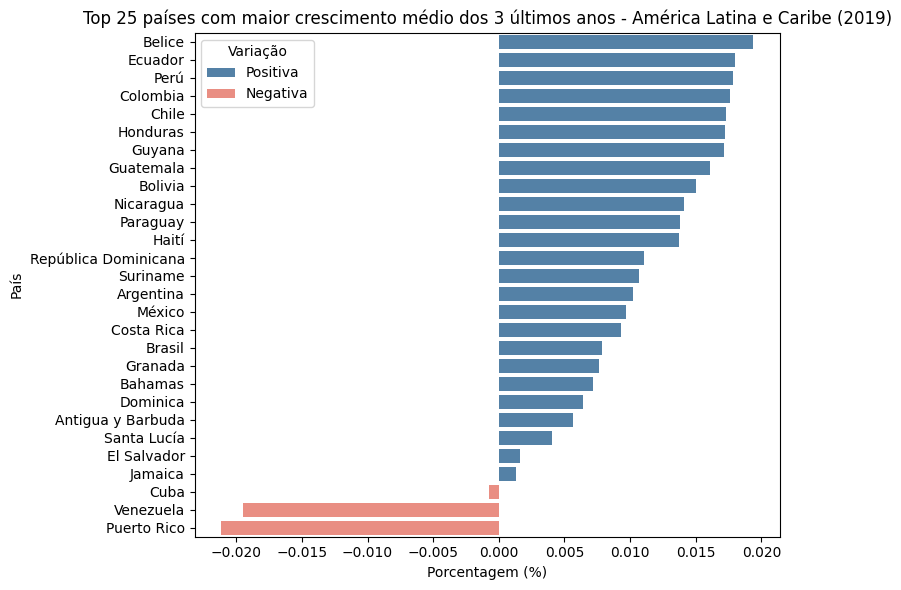

In [ ]:
# Criar coluna auxiliar para cor
df_enriq_poblacao_mund_2019['var_tipo'] = df_enriq_poblacao_mund_2019['media_3_var_prc'].apply(
    lambda x: 'Positiva' if x >= 0 else 'Negativa'
)

# Criar o gráfico com hue pela nova coluna
plt.figure(figsize=(8,6))

sns.barplot(
    data=df_enriq_poblacao_mund_2019,
    x='media_3_var_prc',
    y='Country Name_x',
    hue='var_tipo',
    dodge=False,  # impede barras duplas para o mesmo país
    palette={'Positiva': 'steelblue', 'Negativa': 'salmon'}
)

# Títulos e rótulos
plt.title('Crescimento Populacional médio dos 3 últimos anos dos paises de América Latina e Caribe (2019)')
plt.xlabel('Porcentagem (%)')
plt.ylabel('País')
plt.legend(title='Variação')
plt.tight_layout()
plt.show()

### Tab IDE

In [47]:
dfs['IDE'].shape

(2472, 3)

In [48]:
dfs['IDE'].sample(5)

,"Annex table 1. FDI inflows, by region and economy, 1990-2019 (Millions of dollars)",Unnamed: 1,Unnamed: 2
437,Cayman Islands,2011,16 716.5
243,Uzbekistan,2010,1 636.4
2409,Aruba,2019,- 76.0
323,Togo,2011,711.1
2059,"Congo, Democratic Republic of",2018,1 616.8


In [ ]:
# Deletar as 2 primeiras linhas que estão no dataframe sem mexer nos cabeçalhos 
dfs['IDE'].columns = ['Region/economy', 'Year', 'Value']
dfs['IDE'].dropna(subset=['Region/economy'], inplace=True)
dfs['IDE'].head()


In [50]:
dfs['IDE'].columns = ['Region/economy', 'Year', 'Value']
dfs['IDE'].dropna(subset=['Region/economy'], inplace=True)
dfs['IDE']

,Region/economy,Year,Value
1,Region/economy,Year,Value
2,World,2010,1 396 203.3
3,Developed economies,2010,710 394.4
4,Europe,2010,441 247.2
5,European Union,2010,394 082.2
...,...,...,...
2467,Georgia,2019,1 267.7
2468,Memorandum,2019,NaN
2469,Least developed countries (LDCs),2019,21 147.3
2470,Landlocked countries (LLCs),2019,22 001.8


### Tab GDP

In [117]:
dfs['GDP'].shape

(8686, 4)

In [119]:
dfs['GDP'].head()

,"Gross domestic product: GDP by type of expenditure, VA by kind of economic activity, total and shares, annual [US dollars at current prices in millions]",Unnamed: 1,Unnamed: 2,Unnamed: 3
0,ECONOMY,COMPONENT,YEAR,GDP
1,United Nations member States,Gross domestic product (GDP),2018,"84,610,025.43"
2,United Nations member States,Total value added,2018,"80,626,879.67"
3,United Nations member States,Gross domestic product (GDP),2017,"79,750,397.45"
4,United Nations member States,Gross domestic product (GDP),2014,"78,300,791.33"


In [139]:
dfs['GDP'].columns = list(dfs['GDP'].iloc[0].values)

dfs['GDP'] = dfs['GDP'].iloc[1:]

In [140]:
dfs['GDP'] 

,ECONOMY,COMPONENT,YEAR,GDP
1,United Nations member States,Gross domestic product (GDP),2018,"84,610,025.43"
2,United Nations member States,Total value added,2018,"80,626,879.67"
3,United Nations member States,Gross domestic product (GDP),2017,"79,750,397.45"
4,United Nations member States,Gross domestic product (GDP),2014,"78,300,791.33"
5,United Nations member States,Gross domestic product (GDP),2013,"76,463,177.52"
...,...,...,...,...
8681,Dominica,"Transport, storage and communications",2014,61.85
8682,Dominica,"Transport, storage and communications",2012,61.34
8683,Dominica,"Transport, storage and communications",2011,58.71
8684,Dominica,"Transport, storage and communications",2010,55.66


### Tab Defaults

In [142]:
dfs['Defaults'].shape

(13, 3)

In [144]:
dfs['Defaults'].head(10)

,Pais,Fecha,Cantidad
0,Ecuador,1980-2000,3
1,Venezuela,1980-2000,4
2,Brasil,1980-2000,1
3,Chile,1980-2000,1
4,Costa Rica,1980-2000,3
5,Uruguay,1980-2000,4
6,Argentina,1980-2000,4
7,Mexico,1980-2000,1
8,Peru,1980-2000,2
9,Ecuador,desde 2000,1


### Tab Riesgo país

In [532]:
dfs['Riesgo país'].shape

(54876, 3)

In [533]:
dfs['Riesgo país'].head(10)

,Fecha,Pais,Riesgo
0,2007-10-29 00:00:00,Argentina,3.50
1,2007-10-30 00:00:00,Argentina,3.41
2,2007-10-31 00:00:00,Argentina,2023-12-03 00:00:00
3,2007-11-01 00:00:00,Argentina,3.29
4,2007-11-02 00:00:00,Argentina,3.41
5,2007-11-05 00:00:00,Argentina,3.55
6,2007-11-06 00:00:00,Argentina,3.45
7,2007-11-07 00:00:00,Argentina,3.60
8,2007-11-08 00:00:00,Argentina,3.85
9,2007-11-09 00:00:00,Argentina,3.87


In [534]:
dfs['Riesgo país']['Riesgo'] = dfs['Riesgo país']['Riesgo'].apply(lambda x: f"{x.day}.{x.month}" 
                                                                  if isinstance(x, (pd.Timestamp, datetime)) 
                                                                  else x)

In [535]:
dfs['Riesgo país'].tail(10)

,Fecha,Pais,Riesgo
54866,11-Sep-20,Venezuela,295.80
54867,14-Sep-20,Venezuela,294.25
54868,15-Sep-20,Venezuela,295.76
54869,16-Sep-20,Venezuela,290.43
54870,17-Sep-20,Venezuela,294.92
54871,18-Sep-20,Venezuela,295.56
54872,21-Sep-20,Venezuela,297.11
54873,22-Sep-20,Venezuela,298.49
54874,23-Sep-20,Venezuela,300.07
54875,24-Sep-20,Venezuela,306.26


In [536]:
dfs['Riesgo país']['Pais'].unique()

array(['Argentina', 'REP DOM', 'Bolivia', 'Brasil', 'Chile', 'Colombia',
       'Costa Rica', 'Ecuador', 'El Salvador', 'Guatemala', 'Honduras',
       'México', 'Paraguay', 'Perú', 'Panamá', 'Uruguay', 'Venezuela'],
      dtype=object)

In [563]:
# Formatação da coluna
dfs['Riesgo país']['Fecha'] = pd.to_datetime(dfs['Riesgo país']['Fecha'], infer_datetime_format=True, errors='coerce')
dfs['Riesgo país']['Riesgo'] = dfs['Riesgo país']['Riesgo'].astype(float)

/tmp/ipykernel_2292032/1001309194.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dfs['Riesgo país']['Fecha'] = pd.to_datetime(dfs['Riesgo país']['Fecha'], infer_datetime_format=True, errors='coerce')


In [564]:
dfs['Riesgo país'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54876 entries, 0 to 54875
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          54876 non-null  datetime64[ns]
 1   Pais           54876 non-null  object        
 2   Riesgo         48536 non-null  float64       
 3   Fecha_lag_3_y  54876 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 1.7+ MB


In [565]:
dfs['Riesgo país'].sample(10)

,Fecha,Pais,Riesgo,Fecha_lag_3_y
23765,2012-07-02,Ecuador,8.87,2009-07-02
8038,2014-02-28,Bolivia,3.60,2011-02-28
28073,2016-10-26,El Salvador,4.82,2013-10-26
29623,2010-02-11,Guatemala,NaN,2007-02-11
22704,2008-04-07,Ecuador,6.60,2005-04-07
14327,2013-06-27,Chile,1.83,2010-06-27
453,2009-08-20,Argentina,9.14,2006-08-20
36826,2013-02-07,México,1.67,2010-02-07
52861,2012-09-04,Venezuela,9.98,2009-09-04
33379,2012-03-22,Honduras,NaN,2009-03-22


In [566]:
print(dfs['Riesgo país']['Fecha'].max())
print(dfs['Riesgo país']['Fecha'].min())

2020-09-24 00:00:00
2007-10-29 00:00:00


In [567]:
## dfs['Riesgo país']['Fecha'] - pd.DateOffset(year=3)
from dateutil.relativedelta import relativedelta
dfs['Riesgo país']['Fecha_lag_3_y'] = dfs['Riesgo país']['Fecha'].apply(lambda d: d - relativedelta(years=3))
dfs['Riesgo país']

,Fecha,Pais,Riesgo,Fecha_lag_3_y
0,2007-10-29,Argentina,3.50,2004-10-29
1,2007-10-30,Argentina,3.41,2004-10-30
2,2007-10-31,Argentina,3.12,2004-10-31
3,2007-11-01,Argentina,3.29,2004-11-01
4,2007-11-02,Argentina,3.41,2004-11-02
...,...,...,...,...
54871,2020-09-18,Venezuela,295.56,2017-09-18
54872,2020-09-21,Venezuela,297.11,2017-09-21
54873,2020-09-22,Venezuela,298.49,2017-09-22
54874,2020-09-23,Venezuela,300.07,2017-09-23


In [568]:
df_risco_2020 = dfs['Riesgo país'][dfs['Riesgo país']['Fecha']== '2020-09-24'][['Fecha', 'Pais', 'Riesgo', 'Fecha_lag_3_y']]

df_risco_2017 = dfs['Riesgo país'][dfs['Riesgo país']['Fecha']== '2017-09-22']
df_merge_risco = df_risco_2020.merge( df_risco_2017, 
                                     how='left',
                                     left_on=['Pais'], 
                                     right_on=['Pais']
                                     )[['Fecha_x', 'Pais', 'Riesgo_x', 'Riesgo_y']
                                       ].rename(columns={
                                           'Fecha_x': 'Fecha',
                                             'Riesgo_x': 'Riesgo_2020',
                                             'Riesgo_y': 'Riesgo_2017'})

df_merge_risco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        17 non-null     datetime64[ns]
 1   Pais         17 non-null     object        
 2   Riesgo_2020  17 non-null     float64       
 3   Riesgo_2017  17 non-null     float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 672.0+ bytes


In [571]:
# Vriação percentual do risco
df_merge_risco['var_risco'] = df_merge_risco['Riesgo_2020'] / df_merge_risco['Riesgo_2017'] - 1
df_merge_risco.sort_values(by='var_risco', ascending=False, inplace=True)
df_merge_risco.head(20)

,Fecha,Pais,Riesgo_2020,Riesgo_2017,var_risco
16,2020-09-24,Venezuela,306.26,30.94,8.898513
0,2020-09-24,Argentina,13.59,3.79,2.585752
2,2020-09-24,Bolivia,6.17,2.12,1.910377
11,2020-09-24,México,5.22,2.41,1.165975
6,2020-09-24,Costa Rica,6.67,3.56,0.873596
14,2020-09-24,Panamá,2.30,1.28,0.796875
8,2020-09-24,El Salvador,8.41,4.92,0.709350
1,2020-09-24,REP DOM,4.91,2.89,0.698962
7,2020-09-24,Ecuador,10.12,6.29,0.608903
9,2020-09-24,Guatemala,3.23,2.10,0.538095


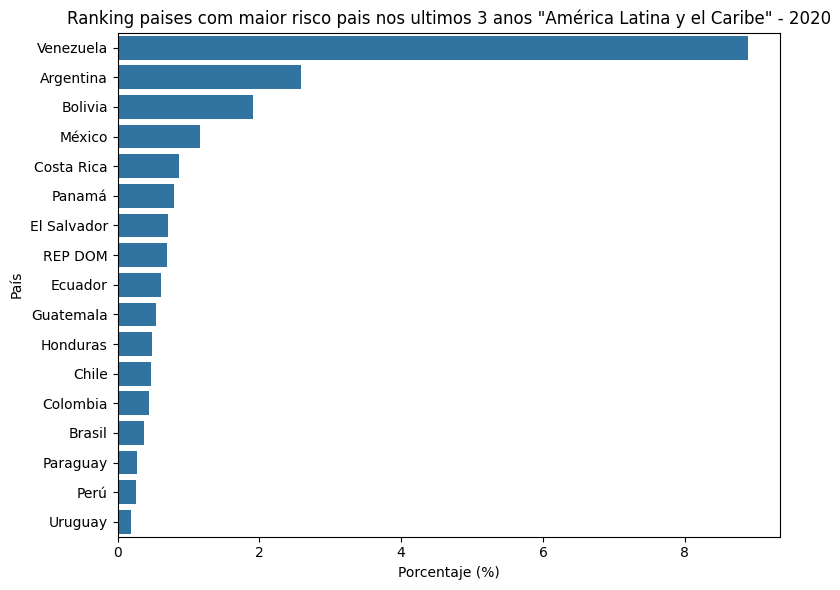

In [574]:
plt.figure(figsize=(8,6))

sns.barplot(data=df_merge_risco, x='var_risco', y='Pais')

# Títulos e rótulos
plt.title('Ranking paises com maior risco pais nos ultimos 3 anos "América Latina y el Caribe" - 2020')
plt.xlabel('Porcentaje (%)')
plt.ylabel('País')
# plt.legend(title='Grupo de Renda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Tab Países

In [154]:
dfs['Países'].shape

(275, 5)

In [116]:
dfs['Países'].head()

,Country Name,Country Code,Region,Income_Group,Codigo Moneda
0,Ingreso mediano,MIC,NaN,Agregados,NaN
1,Afganistán,AFG,Asia meridional,Países de ingreso bajo,NaN
2,África al sur del Sahara,SSF,NaN,Agregados,NaN
3,África al sur del Sahara (BIRF y la AIF),TSS,NaN,Agregados,NaN
4,África al sur del Sahara (excluido altos ingre...,SSA,NaN,Agregados,NaN


In [175]:
dfs['Países'][dfs['Países']['key_CN'].str.contains('nueva')]

,Country Name,Country Code,Region,Income_Group,Codigo Moneda,Key_CN,key_CN
187,Nueva Caledonia,NCL,NaN,Ingreso alto,NaN,nueva caledonia,nueva caledonia
188,Nueva Zelandia,NZL,NaN,Ingreso alto,NaN,nueva zelandia,nueva zelandia
203,Papua Nueva Guinea,PNG,Asia oriental y el Pacífico (excluido altos in...,Países de ingreso mediano bajo,NaN,papua nueva guinea,papua nueva guinea


### Tab Tipo de cambio USD

In [38]:
dfs['Tipo de cambio USD'].shape

(223, 51)

In [39]:
dfs['Tipo de cambio USD'].sample(10)

,YEAR,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
124,Malta (EUR),0.970573,0.948305,0.888835,0.859065,0.897931,0.896304,0.9903,0.983716,0.897702,0.83501,0.804628,0.900771,0.960034,1.007336,1.073921,1.092837,0.915426,0.804779,0.770689,0.811769,0.740252,0.752952,0.742892,0.890495,0.880319,0.822406,0.839636,0.899059,0.904867,0.938283,1.082705,1.116533,1.057559,0.884048,0.803922,0.8038,0.796433,0.729672,0.679923,0.716958,0.754309,0.718414,0.778338,0.752945,0.752728,0.901296,0.903421,0.885206,0.846773,0.893276
14,Bahamas (BSD),1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
42,"China excluding Hong Kong, Macao and Taiwan (CNY)",2.461809,2.461809,2.245066,1.989416,1.961107,1.859823,1.941415,1.857823,1.683589,1.554939,1.498386,1.704542,1.892542,1.975675,2.320042,2.936658,3.452792,3.7221,3.7221,3.765108,4.783208,5.323392,5.514592,5.761958,8.618743,8.351417,8.314175,8.289817,8.278958,8.27825,8.278504,8.277068,8.276957,8.277037,8.276801,8.194317,7.973438,7.607532,6.948655,6.831416,6.770269,6.461461,6.312333,6.195758,6.143434,6.227489,6.644478,6.758755,6.615957,6.908385
39,Central African Republic (XAF),276.403137,275.356457,252.027627,222.889183,240.704668,214.3129,238.950494,245.679687,225.65586,212.721644,211.279555,271.731453,328.606253,381.066036,436.956666,449.262963,346.305904,300.536562,297.848219,319.0083,272.264788,282.106909,264.691801,283.162579,555.204696,499.148426,511.55243,583.669372,589.951775,615.473349,710.207977,732.397693,693.713227,579.897426,527.338032,527.258363,522.425625,478.633718,446.000041,470.293423,494.794262,471.248626,510.556338,493.899624,493.75733,591.211698,592.605615,580.65675,555.446458,585.911013
25,"Bonaire, Saint Eustatius and Saba (USD)",_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,1,1,1,1,1,1,1,1,1
54,Cuba (CUP),1,1,0.953,0.829,0.82,0.82,0.821,0.83,0.77,0.73,0.72,0.83,0.85,0.85897,0.8785,0.91586,0.83341,0.78631,0.758,0.78025,0.752,0.73266,0.74,0.74,0.74,0.783333,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.9925,1,1,1,0.999167,1,1,1,1
7,Antigua and Barbuda (XCD),2.0,1.974873,1.921278,1.959219,2.053232,2.169796,2.614671,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7
96,Iran (Islamic Republic of) (IRR),75.75,75.75,75.74997,68.8869,67.644775,67.658379,70.242635,70.637317,70.495609,70.495609,70.635433,78.350822,83.626914,86.38312,90.056011,207.3,217.5,221.6,237.1,299.1,394.2,511.7,655.1,890.083,1221.7,1725.8,2194,2779.5,3206,4172,5731,6163.4,6907.034456,8193.887519,8613.989421,8963.958907,9170.942878,9281.151828,9428.528261,9864.302456,10254.17647,10616.30664,12175.54722,18414.44801,25941.66414,29011.49138,30914.85244,33226.29815,40864.32901,42000
159,Poland (PLN),0.004,0.003893,0.00368,0.00335,0.00332,0.00332,0.00332,0.00332,0.0033,0.00332,0.004422,0.005115,0.008482,0.009155,0.011324,0.014714,0.017529,0.026508,0.043055,0.143918,0.95,1.057606,1.362643,1.811497,2.272277,2.424983,2.6961,3.279292,3.4754,3.967108,4.346075,4.0939,4.080033,3.889075,3.657642,3.235483,3.103158,2.76795,2.409242,3.120142,3.0153,2.962848,3.256542,3.160617,3.154542,3.7695,3.942783,3.779333,3.611717,3.839375
114,Lesotho (LSL),0.714286,0.715217,0.768725,0.693959,0.679477,0.739508,0.869565,0.869565,0.869565,0.842023,0.778834,0.877579,1.085816,1.1141,1.475278,2.228675,2.285032,2.036033,2.273468,2.622677,2.587321,2.761315,2.852014,3.267742,3.550798,3.627085,4.299349,4.607962,5.528284,6.109484,6.939828,8.609181,10.540747,7.564749,6.459693,6.359328,6.771549,7.045365,8.261223,8.473674,7.321222,7.261132,8.209969,9.655056,10.852656,12.758931,14.709611,13.323801,13.233926,14.451789
